In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!tar xf /content/gdrive/MyDrive/esun_2021_data/模型訓練資料.tar
!unzip -q /content/gdrive/MyDrive/esun_2021_data/empty_character.zip
!unzip -q /content/gdrive/MyDrive/esun_2021_test_data/玉山_20210524_image_labeled.zip
!unzip -q /content/gdrive/MyDrive/esun_2021_test_data/玉山_20210525_image_labeled.zip
!unzip -q /content/gdrive/MyDrive/esun_2021_test_data/快車肉乾.zip
!unzip -q /content/gdrive/MyDrive/esun_2021_test_data/玉山_20210608_image_labeled.zip
!unzip -O big5 -q /content/gdrive/MyDrive/esun_2021_test_data/20210615_玉山重新標註後照片.zip
!unzip -O big5 -q /content/gdrive/MyDrive/esun_2021_test_data/20210616_玉山重新標註後照片.zip
!unzip -O big5 -q /content/gdrive/MyDrive/esun_2021_test_data/20210617_玉山重新標註後照片.zip
!ls

20210615_玉山重新標註後照片  gdrive	  快車肉乾
20210616_玉山重新標註後照片  __MACOSX	  玉山_20210524_image_labeled
20210617_玉山重新標註後照片  sample_data  玉山_20210525_image_labeled
empty_character		     train	  玉山_20210608_image_labeled


In [3]:
!pip install pytorch-lightning --quiet
!pip install -U albumentations --quiet
!pip install pandas_ods_reader --quiet
!pip install hanziconv --quiet
# !pip install efficientnet_pytorch --quiet

     |████████████████████████████████| 819kB 7.5MB/s 
     |████████████████████████████████| 645kB 52.9MB/s 
     |████████████████████████████████| 10.6MB 52.0MB/s 
     |████████████████████████████████| 829kB 49.7MB/s 
     |████████████████████████████████| 112kB 55.0MB/s 
     |████████████████████████████████| 276kB 18.7MB/s 
     |████████████████████████████████| 1.3MB 50.7MB/s 
     |████████████████████████████████| 143kB 57.3MB/s 
     |████████████████████████████████| 296kB 50.6MB/s 
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.4.1 which is incompatible.
     |████████████████████████████████| 102kB 5.2MB/s 
     |████████████████████████████████| 38.2MB 74kB/s 
     |████████████████████████████████| 133kB 7.4MB/s 
     |████████████████████████████████| 286kB 7.1MB/s 


In [4]:
!git clone https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset.git
!cat /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data*.zip* > /content/Traditional-Chinese-Handwriting-Dataset/data/all_data.zip
!unzip -q /content/Traditional-Chinese-Handwriting-Dataset/data/all_data.zip -d "/content"
# folder: "cleaned_data(50_50)"

Cloning into 'Traditional-Chinese-Handwriting-Dataset'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 174 (delta 75), reused 22 (delta 6), pack-reused 18
Receiving objects: 100% (174/174), 77.40 MiB | 31.12 MiB/s, done.
Resolving deltas: 100% (77/77), done.
warning [/content/Traditional-Chinese-Handwriting-Dataset/data/all_data.zip]:  113239279 extra bytes at beginning or within zipfile
  (attempting to process anyway)


In [5]:
!wget -q https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Medium.otf
!wget -q https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Bold.otf

In [6]:
!wget -q https://www.cns11643.gov.tw/AIDB/Open_Data.zip
!unzip -q Open_Data.zip -d "cns"

Open_Data/Fonts/全字庫字型說明文件.txt:  mismatching "local" filename (Open_Data/Fonts/хЕихнЧх║лхнЧхЮЛшккцШОцЦЗф╗╢.txt),
         continuing with "central" filename version
Open_Data/MapingTables/Big5/CNS2BIG5_七個倚天外字.txt:  mismatching "local" filename (Open_Data/MapingTables/Big5/CNS2BIG5_ф╕ГхАЛхАЪхдйхдЦхнЧ.txt),
         continuing with "central" filename version
Open_Data/MapingTables/Big5/CNS2BIG5_符號.txt:  mismatching "local" filename (Open_Data/MapingTables/Big5/CNS2BIG5_чмжшЩЯ.txt),
         continuing with "central" filename version
Open_Data/MapingTables/全字庫中文對照表說明文件.txt:  mismatching "local" filename (Open_Data/MapingTables/хЕихнЧх║лф╕нцЦЗх░НчЕзшбишккцШОцЦЗф╗╢.txt),
         continuing with "central" filename version
Open_Data/MapingTables/地政/:  mismatching "local" filename (Open_Data/MapingTables/хЬ░цФ┐/),
         continuing with "central" filename version
Open_Data/MapingTables/地政/南投縣.txt:  mismatching "local" filename (Open_Data/MapingTables/хЬ░цФ┐/хНЧцКХч╕г.txt),
         continuin

In [7]:
!wget -q https://github.com/kirosc/chinese-calligraphy-dataset/raw/master/data-jpg.7z
!7z x data-jpg.7z > nul

In [8]:
!wget -q http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar
!tar xvf kkanji.tar > nul

In [9]:
# Set the path to save PyTorch model
MODEL_SAVE_PATH = '/content/gdrive/MyDrive/esun_2021_model/'

In [10]:
import matplotlib.pyplot as plt
# import matplotlib.patches as patches
import numpy as np
import pandas as pd
import cv2
import random
import re
from skimage import io, transform
from PIL import Image, ImageFont, ImageDraw
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pathlib import Path
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, models
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
import albumentations as A
from albumentations.pytorch import ToTensorV2
from pandas_ods_reader import read_ods
from hanziconv import HanziConv

MODEL_SAVE_PATH = Path(MODEL_SAVE_PATH)
TRAIN_DATA_PATH = Path("train")
TC_DATA_PATH = Path("cleaned_data(50_50)")
CALLI_DATA_PATH = Path("data-jpg")
KANJI_DATA_PATH = Path("kkanji2")
FREQ_CHAR_SET = set(read_ods("/content/gdrive/MyDrive/教育部4808個常用字.ods", 1)['常用字'].unique())
NULL_CHR = "isnull"
with open(MODEL_SAVE_PATH/"training data dic.txt", "r") as f:
    VOCAB = set([x.replace("\n", "") for x in f.readlines()])
VOCAB_SIMP = dict()
for v in VOCAB:
    if v in ('台', '臺', '制'): continue
    s = HanziConv.toSimplified(v)
    if v != s and s not in VOCAB: 
        VOCAB_SIMP[s] = v
ISNULL_CHAR_SET = FREQ_CHAR_SET.difference(VOCAB)
CONF_CHAR_SET = {'研', '影', '琪', '盛', '法', '漢', '士', '涵', '善', '瑋', '裝', '數', '份', '鳳', '紘', '寬', '雯', '閎', '療', '仕', '色', '憶', '司', '醫', '公', '建', '製', '翰', '格', '鈺', '坊', '汽', '陳', '添', '統', '開', '立', '寶', '器', '淑', '思', '動', '妹', '北', '丞', '紅', '寓', '木', '傅', '川', '暘', '申', '證', '欽', '料', '銓', '務', '券', '賀', '珍', '永', '宜', '問', '亮', '皇', '五', '芳', '宣', '事', '包', '白', '連', '美', '米', '風', '團', '勤', '託', '迪', '私', '業', '陽', '台', '車', '瀚', '巨', '土', '堂', '心', '具', '電', '山', '創', '梅', '客', '代', '璟', '玲', '大', '菱', '莊', '小', '花', '意', '貨', '圓', '朱', '王', '利', '傑', '運', '食', '林', '村', '廣', '整', '容', '奕', '經', '廈', '材', '場', '酒', '可', '記', '玉', '鑽', '職', '活', '香', '伶', '揚', '關', '春', '鍾', '員', '圖', '珠', '于', '理', '湯', '豪', '通', '百', '典', '宗', '顧', '園', '貿', '介', '子', '奇', '管', '姜', '雲', '會', '鈴', '師', '中', '承', '育', '賃', '千', '自', '鎮', '系', '位', '柏', '瑛', '不', '賓', '芸', '紀', '許', '銘', '威', '有', '仲', '易', '慶', '毅', '市', '限', '禾', '泓', '律', '塑', '室', '鐵', '鋼', '弘', '科', '傳', '資', '億', '楊', '巫', '恩', '險', '膠', '秋', '實', '合', '兆', '投', '普', '貝', '榕', '石', '居', '昕', '環', '用', '診', '品', '股', '勳', '閔', '專', '館', '區', '委'}
assert len(CONF_CHAR_SET.intersection(VOCAB)) == len(CONF_CHAR_SET)

%matplotlib inline

In [11]:
# Train Valid Split
## indices 紀錄的是檔名最前面的號碼 (integer) 
## 取 20% Valid Data (依照字頻)

def get_file_index(file_name):
    return int(re.findall("(\d+)_\w+.\w+", file_name)[0])

_train_data = sorted([p.name for p in TRAIN_DATA_PATH.iterdir() if p.is_file()], key=get_file_index)
train_indices, valid_indices = train_test_split([get_file_index(x) for x in _train_data], stratify=[re.findall("\d+_(\w+).\w+", x)[0] for x in _train_data], test_size=0.17, random_state=9487)
train_indices, valid_indices = set(train_indices), set(valid_indices)
print(len(train_indices), len(valid_indices)) # 57107, 11697
print(len(valid_indices)/len(train_indices))  # 0.20482602833277883
assert len({67560, 10380, 36789}-valid_indices)==0 and len({10623, 45037, 66898}-train_indices)==0 # Sanity Check for all machines
del _train_data

# ## Train Valid Split 使用示範
# _train_data = [p.name for p in TRAIN_DATA_PATH.iterdir() if p.is_file()]
# print(_train_data[:5]) # ['24302_黃.jpg', '46222_法.jpg', '45243_琦.jpg', '50164_宇.jpg', '51314_元.jpg']

# # 取用方法一：以檔名開頭取用
# train_data, valid_data = [x for x in _train_data if get_file_index(x) in train_indices], [x for x in _train_data if get_file_index(x) in valid_indices]
# print(len(train_data), len(valid_data))
# assert len({'7300_莉.jpg', '57705_采.jpg', '56004_靖.jpg'}-set(valid_data))==0 and len({'4302_蘭.jpg', '7716_薇.jpg', '24865_軒.jpg'}-set(train_data))==0 # Sanity Check for all machines

# # 取用方法二：排序後，直接以 indices 取用
# _train_data.sort(key=get_file_index) # 用檔名前面的號碼排序，就可以直接以 indices 取用
# print(_train_data[:5]) # ['0_戶.jpg', '1_經.jpg', '2_惠.jpg', '3_葳.jpg', '4_學.jpg']
# train_data, valid_data = [x for i, x in enumerate(_train_data) if i in train_indices], [x for i, x in enumerate(_train_data) if i in valid_indices]
# print(len(train_data), len(valid_data))
# assert len({'7300_莉.jpg', '57705_采.jpg', '56004_靖.jpg'}-set(valid_data))==0 and len({'4302_蘭.jpg', '7716_薇.jpg', '24865_軒.jpg'}-set(train_data))==0 # Sanity Check for all machines

57107 11697
0.20482602833277883


2245
17758 彥 => isnull


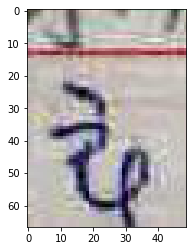

66725 寓 => 寓


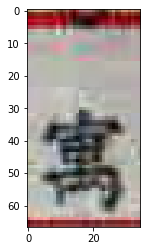

39351 教 => isnull


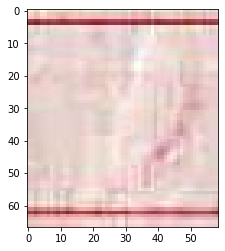

40538 廠 => 工


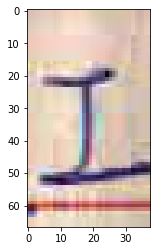

66978 刷 => 科


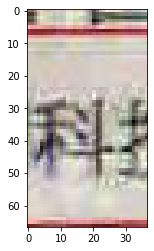

7839 守 => isnull


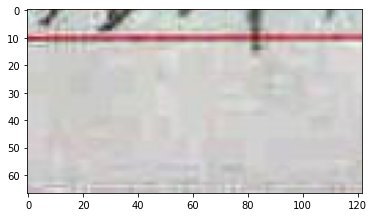

16915 恩 => 扶


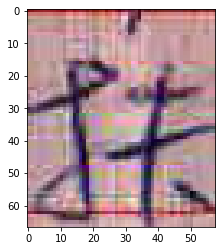

61198 科 => 有


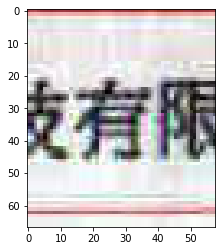

23112 告 => 設


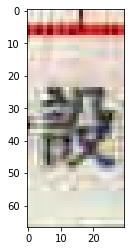

49367 區 => 理


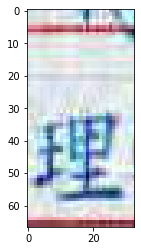

In [12]:
RESOLVE = {4041: '宏', 4045: '企', 3044: '戶', 7108: '設', 7641: 'isnull', 8043: '館', 8129: 'isnull', 8847: '旅', 9834: '登', 277: '茂', 411: 'isnull', 421: '理', 465: '限', 474: '有', 631: '專', 735: 'isnull', 922: '所', 1064: '院', 1163: '會', 1233: 'isnull', 1606: '限', 1788: '公', 1965: '委', 2022: '大', 2249: '潔', 2741: 'isnull', 3289: '行', 3433: '統', 3436: 'isnull', 3598: '司', 3984: '汽', 4408: '股', 4517: '物', 4878: '公', 4944: '廈', 5339: '調', 5425: '家', 5527: '委', 5629: '統', 6576: '司', 6655: '財', 6869: '名', 7123: '建', 7141: 'isnull', 7317: '基', 7397: '司', 8051: '有', 8610: 'isnull', 8957: '理', 9032: '造', 9231: '物', 9658: '料', 9819: '盛', 9853: '山', 9904: '管', 10266: '有', 10527: '司', 10810: '股', 10958: '物', 11386: '統', 11628: '銀', 11761: '建', 12009: '公', 12111: '金', 12296: '保', 12420: '公', 12676: '理', 12903: '有', 13418: '款', 13511: '公', 13601: '國', 13791: '得', 14155: '行', 14320: '會', 14564: '公', 14710: '司', 14794: '企', 14967: '科', 15467: '設', 15811: '行', 16024: '公', 16157: '心', 16674: '洋', 16800: '有', 16991: '行', 17225: '科', 17260: '法', 17346: '司', 17584: '有', 17595: '司', 18074: '工', 18204: '專', 18308: '法', 18335: '會', 18449: '銀', 18735: '禾', 18785: '醫', 18812: '技', 19324: '有', 19560: '建', 19902: '限', 20020: '銀', 20049: '限', 20228: '家', 20472: '行', 20576: '行', 20695: '文', 21398: '技', 21571: '會', 21929: '行', 22276: '公', 22526: '公', 22666: '銀', 22889: '團', 23109: '司', 24465: '醫', 24666: '醫', 24828: '建', 24851: '限', 25028: '公', 25089: '戶', 25155: '材', 25346: '基', 25432: '有', 25848: '行', 26035: '公', 26052: '有', 26568: '分', 27152: '銀', 27218: '有', 27349: '所', 27368: '德', 27446: '限', 27933: '合', 28234: '銀', 28286: '造', 28416: '員', 28532: '企', 28649: '理', 28760: '儀', 28784: '行', 28833: '銀', 29124: '會', 29325: '行', 29352: '生', 29592: '限', 29629: '份', 30369: '造', 30419: '造', 30483: '基', 30537: '委', 30585: '民', 30849: '材', 30865: '汽', 31002: '員', 31182: '股', 31756: '合', 31794: '社', 31992: '專', 32050: '術', 32698: '司', 33051: '限', 33057: '會', 33130: '行', 33308: '權', 33311: '有', 33489: '有', 33571: '建', 33660: '有', 33865: '行', 33997: '台', 34406: '行', 34450: '之', 34530: '樂', 34734: '療', 35251: '有', 35279: '醫', 35336: '強', 35536: '新', 35589: '問', 35915: '雄', 36224: '物', 36449: '廈', 37393: 'isnull', 37771: '合', 37795: '技', 37868: '醫', 38047: '公', 38723: '股', 38811: '問', 39027: '銀', 39165: '行', 39484: '戶', 39558: '銀', 39984: '財', 39988: '有', 40106: '有', 40113: '有', 40630: '銀', 40983: 'isnull', 40993: '理', 41028: '容', 41093: '汽', 41238: '裝', 42077: '專', 43059: '有', 43177: '份', 43389: 'isnull', 43397: '會', 44206: '限', 44555: 'isnull', 44969: '有', 45244: '款', 45514: '基', 45658: '行', 45798: 'isnull', 45879: '院', 46062: '系', 46156: '社', 46356: '行', 46463: '問', 46714: '汽', 46801: '材', 46998: '專', 47246: '限', 47757: '樓', 48148: '款', 48214: '戶', 48537: '行', 48580: '新', 48599: '保', 48860: '會', 48937: '份', 49173: '股', 49701: '院', 49889: '有', 50163: '大', 50193: '客', 50522: '材', 50640: '管', 51063: '禾', 51119: '有', 51125: '股', 51641: '限', 51783: '銷', 51929: '金', 52097: '社', 52127: '品', 52198: '科', 52235: '大', 52679: '科', 52745: '廈', 52780: '合', 53088: '委', 53125: '行', 53445: '行', 53584: '限', 53751: '山', 54109: '小', 54193: '會', 54248: '社', 54335: '有', 54551: '銀', 54777: '大', 55367: '有', 55405: '昇', 55518: '局', 55552: '款', 56055: '金', 56126: '社', 56215: '限', 56437: '大', 56460: '金', 56525: '合', 56533: '管', 56701: '統', 56730: '款', 56856: '員', 57022: '行', 57248: '有', 57529: '銀', 57873: '行', 57936: '大', 58121: '有', 58609: '律', 59029: '理', 59075: '法', 59107: '員', 59152: '商', 59855: '有', 60420: '限', 61198: '有', 61284: '禾', 61418: '限', 61574: '客', 61770: '行', 61813: '儀', 61901: 'isnull', 62250: '法', 62655: '戶', 62844: '款', 62870: '保', 63128: '限', 63513: '公', 63586: '醫', 63763: '合', 64249: '造', 64318: '限', 64344: '股', 65147: '銀', 65212: '金', 65426: '聯', 65578: '公', 65672: '公', 65729: '元', 65820: '計', 65852: '材', 65930: '限', 66346: '司', 66514: '司', 66520: '委', 66582: '物', 66692: '限', 66772: '科', 67406: '基', 67539: '理', 67567: '問', 67694: '科', 68061: '理', 68165: '廈', 68346: '德', 68428: '行', 68441: '系', 68635: '行', 68676: '股', 19968: 'isnull', 45058: 'isnull', 59909: 'isnull', 10758: 'isnull', 16391: 'isnull', 29196: 'isnull', 25102: 'isnull', 57358: 'isnull', 22548: 'isnull', 60953: 'isnull', 32798: 'isnull', 60446: 'isnull', 25120: 'isnull', 50721: 'isnull', 31277: 'isnull', 32815: 'isnull', 23088: 'isnull', 17970: 'isnull', 25650: 'isnull', 41019: 'isnull', 47165: 'isnull', 30799: 'isnull', 22097: 'isnull', 62567: 'isnull', 65646: 'isnull', 4719: 'isnull', 10863: 'isnull', 51833: 'isnull', 11902: 'isnull', 50306: 'isnull', 66691: 'isnull', 3204: 'isnull', 60042: 'isnull', 54411: 'isnull', 5775: 'isnull', 37009: 'isnull', 65169: 'isnull', 31891: 'isnull', 40084: 'isnull', 16543: 'isnull', 5796: 'isnull', 52400: 'isnull', 36532: 'isnull', 21175: 'isnull', 66747: 'isnull', 21186: 'isnull', 14027: 'isnull', 26828: 'isnull', 53963: 'isnull', 62159: 'isnull', 53456: 'isnull', 14545: 'isnull', 6361: 'isnull', 38626: 'isnull', 13539: 'isnull', 65251: 'isnull', 39143: 'isnull', 33516: 'isnull', 9454: 'isnull', 26354: 'isnull', 43255: 'isnull', 4346: 'isnull', 63227: 'isnull', 51967: 'isnull', 47366: 'isnull', 21269: 'isnull', 15146: 'isnull', 14124: 'isnull', 63277: 'isnull', 67375: 'isnull', 31024: 'isnull', 62257: 'isnull', 27459: 'isnull', 14665: 'isnull', 51017: 'isnull', 33104: 'isnull', 38244: 'isnull', 9063: 'isnull', 39271: 'isnull', 65895: 'isnull', 20331: 'isnull', 57198: 'isnull', 50039: 'isnull', 20343: 'isnull', 62328: 'isnull', 34694: 'isnull', 36744: 'isnull', 13708: 'isnull', 14222: 'isnull', 22416: 'isnull', 62972: 'isnull', 10654: 'isnull', 7071: 'isnull', 38821: 'isnull', 7595: 'isnull', 65975: 'isnull', 23993: 'isnull', 67521: 'isnull', 54725: 'isnull', 61389: 'isnull', 28627: 'isnull', 5082: 'isnull', 57320: 'isnull', 43508: 'isnull', 10741: 'isnull', 34296: 'isnull', 19964: 'isnull', 1779: '股', 2447: 'isnull', 3942: '股', 4019: '股', 5046: 'isnull', 5724: '實', 10475: 'isnull', 11033: 'isnull', 12026: '文', 12240: 'isnull', 13490: '學', 14422: '金', 15280: '凱', 16211: '股', 16388: '限', 16679: 'isnull', 17077: '企', 17520: '農', 18747: 'isnull', 21273: 'isnull', 22155: '鴻', 23103: 'isnull', 23664: '益', 28654: 'isnull', 29138: 'isnull', 30766: 'isnull', 30774: '司', 30914: 'isnull', 32378: '金', 32419: 'isnull', 32835: 'isnull', 33577: 'isnull', 35523: 'isnull', 39625: '理', 39685: 'isnull', 41071: 'isnull', 42590: 'isnull', 42753: '公', 43433: 'isnull', 44967: '國', 47547: 'isnull', 47992: '雄', 48606: '金', 49150: 'isnull', 49816: '企', 50439: 'isnull', 50695: 'isnull', 50819: '戶', 56537: '股', 57132: 'isnull', 57214: 'isnull', 59117: 'isnull', 60259: '寧', 61029: 'isnull', 62720: 'isnull', 62758: 'isnull', 62775: 'isnull', 63568: '企', 64739: 'isnull', 65206: 'isnull', 67850: 'isnull', 616: '款', 7137: '股', 7339: '代', 8588: '股', 9484: 'isnull', 9563: '林', 9954: '生', 10168: '谷', 10482: '設', 10610: '天', 10802: '忠', 10972: '事', 13379: '三', 15148: '群', 17013: '國', 18382: '廣', 19024: '生', 19156: '師', 20865: '刷', 21940: '室', 21965: 'isnull', 22912: '會', 23275: '倉', 24304: '分', 24755: '會', 25450: '證', 26507: '女', 26795: '大', 28186: '程', 28377: '公', 29260: '三', 29814: '工', 30819: '志', 31202: '大', 31241: '診', 31602: '新', 33255: 'isnull', 33711: '凱', 34241: '花', 34366: '裝', 34978: '建', 35726: '企', 36406: '振', 38224: '空', 38599: '吉', 39187: '金', 39386: '士', 39399: '館', 39478: '惠', 39618: '會', 39867: '食', 40039: 'isnull', 40176: '家', 40887: '聯', 44623: '銷', 44826: '公', 45034: '股', 45614: '社', 45640: '會', 46014: '兆', 47650: '廠', 47854: '意', 48217: '金', 48369: '通', 48476: '樺', 49412: '所', 49623: '群', 51883: '員', 52275: '倉', 53058: 'isnull', 54674: '戴', 54959: '途', 55195: '理', 56073: '易', 56426: '員', 56803: '台', 58302: '智', 61657: '香', 62132: 'isnull', 64079: '鈞', 64359: '士', 66078: '立', 66806: '仙', 67249: '基', 67336: '化', 68685: '介', 502: '機', 1745: '建', 2357: '御', 4925: '資', 8380: '店', 8907: '裕', 11276: '物', 11940: '設', 13159: '有', 14373: '維', 16240: '限', 16734: '會', 18698: '股', 18709: '務', 19971: '客', 27366: '郁', 29071: 'isnull', 29555: '分', 29976: '業', 30366: '事', 31319: '設', 31601: '有', 32096: '股', 33277: '管', 33685: '產', 33893: '公', 35164: '工', 35221: '業', 35386: '物', 37915: '生', 37960: '易', 39507: '光', 40538: '工', 40541: '投', 40836: 'isnull', 41899: '整', 42141: '股', 42337: '企', 44103: '通', 44698: '業', 45379: '公', 46910: '管', 47157: '和', 47226: '務', 47875: '葉', 48524: '達', 50345: 'isnull', 50377: '委', 50486: '裕', 50705: '昭', 51355: '凍', 51516: '有', 51651: '永', 52243: '股', 53622: '海', 53968: '證', 54237: '鋼', 55437: '券', 55526: '力', 55896: '法', 56368: '計', 56425: '學', 56882: '公', 56954: '航', 57560: '券', 58942: '材', 59368: '銷', 59708: '診', 60479: '月', 61146: '銷', 61279: '董', 61443: '所', 62140: '行', 62929: '股', 63241: '內', 63419: '玻', 63904: '重', 64574: '惠', 64825: '君', 65323: '武', 65611: '教', 65834: '品', 66275: '股', 67710: '行', 67888: '業', 68286: '有', 109: '管', 253: '明', 440: '交', 626: '立', 656: '食', 750: '券', 1427: '顧', 1556: '金', 1594: '法', 1617: '戶', 2736: '銀', 2759: '言', 3028: '克', 3132: '交', 4113: '食', 4114: '怡', 4795: '事', 5752: '力', 5807: '國', 6019: '文', 6474: '資', 6642: '社', 7122: '金', 7180: '錦', 7523: '展', 7753: '歐', 7907: '森', 7978: '長', 8540: '業', 8918: '鐵', 8973: '管', 9104: '修', 9750: '文', 9804: '兒', 9860: '長', 11091: '管', 11490: '亞', 11721: '政', 11723: '國', 11788: '家', 12090: '土', 12752: '業', 13040: '有', 13148: '股', 13995: '社', 14189: '育', 14650: '社', 15091: '建', 15171: '私', 15329: '新', 17092: '業', 17467: '社', 18203: '工', 19550: '社', 19976: '專', 20071: '慧', 20149: '業', 20219: '行', 20557: '國', 21390: '電', 21483: '股', 21859: '業', 22138: '有', 22753: '道', 22833: '證', 22936: '理', 23009: '保', 23114: '戶', 23284: '房', 23334: '管', 23545: 'isnull', 23767: '保', 23769: '企', 24300: '有', 24545: '設', 25280: '女', 25542: '限', 27126: '金', 27324: '商', 47: '鴻', 61: '美', 152: '管', 431: 'isnull', 737: '室', 803: 'isnull', 806: '事', 1042: '券', 1123: '石', 1161: '仲', 1250: '研', 1503: '順', 1540: '北', 1921: '成', 2111: '大', 2254: '國', 2354: '務', 2554: '木', 2706: '登', 2764: '國', 2783: '宏', 2813: '代', 2837: 'isnull', 2911: '韋', 3000: '城', 3059: '食', 3110: '丁', 3386: '產', 3493: '區', 3671: '鋒', 3710: '振', 3760: '扶', 3784: '市', 3836: '嘉', 3847: '侑', 4004: '工', 4148: '輪', 4314: '限', 4366: '工', 4393: '鐘', 4629: '婷', 4632: '運', 4653: '和', 4897: '世', 5039: 'isnull', 5144: '法', 5170: '水', 5195: '數', 5227: '業', 5238: '碧', 5384: '原', 5598: '運', 5682: '有', 6063: '紙', 6157: '信', 6442: '灣', 6476: '國', 6503: '告', 6541: '可', 6799: '里', 6847: '鴻', 6864: '臺', 6934: '科', 7234: '合', 7236: '戶', 7435: '山', 7569: '合', 8347: '盟', 8389: '汽', 8740: '麗', 8806: '投', 8976: '理', 9139: '國', 9206: '金', 9279: '記', 9284: '專', 9600: 'isnull', 9767: '限', 9966: '社', 10183: '業', 10204: '工', 10239: '塑', 10513: '雅', 10651: '法', 10663: '真', 10715: '行', 11219: '國', 11349: '限', 11552: '立', 11588: 'isnull', 11639: '三', 11648: '清', 11997: '理', 12209: '膠', 12248: '用', 13023: '股', 13044: '師', 13193: '地', 13235: '技', 13275: '員', 13297: '塑', 13454: '樹', 13460: 'isnull', 13528: '廖', 13592: 'isnull', 13676: '昱', 13805: '葉', 13818: '問', 14269: 'isnull', 14305: '製', 14547: '資', 14604: '造', 14739: '創', 14885: '股', 14896: '投', 14930: '周', 15309: '祥', 15456: '股', 15549: '戶', 15564: 'isnull', 15639: '方', 15884: 'isnull', 16065: '股', 16162: '吉', 16174: '達', 16197: '有', 16266: '育', 16275: '食', 16336: '景', 16355: '麗', 16366: '醫', 16399: '金', 16915: '扶', 17151: '屋', 17358: '保', 17376: '言', 17523: '設', 17533: '和', 17856: '福', 17896: '誠', 18156: '環', 18366: '林', 18424: '晟', 18475: '張', 18669: '員', 18839: '理', 18918: '醫', 18928: '械', 19241: '水', 19466: '郁', 19982: '汽', 20146: '整', 20265: '有', 20412: '嘉', 20429: '聯', 20444: '實', 20492: '華', 20564: '國', 20575: '意', 20719: '品', 20837: '醫', 20846: '昇', 20986: '元', 21030: '輪', 21131: '苑', 21906: 'isnull', 21219: '券', 21476: 'isnull', 21613: '社', 22056: '志', 22082: 'isnull', 22151: '東', 22306: '木', 22387: '柔', 22551: '證', 22593: '暉', 22709: '順', 22765: '宏', 22943: '菱', 22983: '室', 23003: '時', 23031: '企', 23202: '義', 23643: 'isnull', 23876: '保', 23958: '司', 24144: '樺', 24234: '采', 24367: 'isnull', 24682: '問', 24954: '龍', 24963: '公', 25654: 'isnull', 25657: '英', 25742: '密', 25749: '金', 26304: '曉', 26590: 'isnull', 26666: '五', 26978: '業', 27305: '淨', 27329: '慶', 27420: 'isnull', 27769: '車', 27770: '創', 27965: '興', 28125: '保', 28260: '國', 28439: '凌', 28558: '同', 28564: '社', 29026: '盛', 29115: 'isnull', 29134: '聯', 29216: '綺', 29329: '市', 29468: '社', 29535: '昭', 29666: '灣', 29695: '社', 29777: '凱', 29791: '科', 30006: '城', 30057: '券', 30113: '委', 30437: '行', 30514: '保', 30727: '儒', 30786: '創', 30877: '造', 31159: '禾', 31391: 'isnull', 31438: '美', 31480: '務', 31563: '書', 31572: '達', 31678: '儀', 31715: '證', 31778: '份', 31800: '張', 31846: 'isnull', 31878: '器', 31922: '政', 31957: '事', 32120: '業', 32404: '仲', 32647: '哲', 32689: '月', 32816: '不', 32853: '軒', 33090: '股', 33233: '企', 33505: 'isnull', 33510: '維', 33637: '木', 33706: '區', 33831: '大', 33838: '張', 34002: '耀', 34230: '金', 34369: '料', 34506: '料', 35007: '委', 35213: '力', 35268: '科', 35499: '喜', 35708: '程', 35749: '所', 35844: '億', 35892: '地', 35961: '松', 36187: '世', 36204: '智', 36218: '時', 36311: '飾', 36329: '浩', 36411: '份', 36499: '社', 36752: 'isnull', 36929: '業', 37059: 'isnull', 37287: '技', 37343: '股', 37460: '工', 37730: '銀', 37953: 'isnull', 38126: '企', 38200: '氣', 38234: '食', 38697: '李', 38953: 'isnull', 39193: '材', 39324: '晟', 39347: '易', 39460: '人', 39652: '中', 39674: '運', 39800: '中', 39892: '股', 40317: '景', 40468: '源', 40585: '台', 40860: '天', 40978: '晴', 41000: '鼎', 41285: '股', 41863: '視', 41947: '業', 41959: '瑩', 41979: '司', 42072: 'isnull', 42088: '得', 42109: '玲', 42131: '正', 42199: '醫', 42211: '空', 42277: '兒', 42322: '特', 42408: '行', 42885: '民', 42981: '交', 43014: '位', 43043: '證', 43373: '社', 43513: '仕', 43519: '業', 43643: '戶', 43761: '戶', 43770: '證', 43876: '動', 43933: '上', 43961: '司', 43986: '汽', 44092: '食', 44301: '設', 44324: '車', 44567: '限', 44569: '勝', 44571: '國', 44720: '企', 44728: '仲', 44909: '事', 45072: '企', 45316: '醫', 45646: '保', 45704: '日', 45730: '社', 45754: '武', 45854: '思', 46074: '中', 46306: '器', 46338: '月', 46401: '易', 46729: '樂', 46738: '陽', 46761: '鑫', 46817: '務', 47174: '公', 47203: '洲', 47327: '台', 47379: '所', 47388: '黎', 47522: '園', 47549: '員', 47604: '部', 47907: '國', 47908: '告', 48093: '凱', 48159: 'isnull', 48237: '威', 48354: '專', 48373: '法', 48441: '有', 48626: '合', 48654: '工', 48707: '社', 48715: '台', 49051: '信', 49102: '明', 49264: '金', 49335: '永', 49367: '理', 49963: '器', 50026: '祥', 50275: '發', 50443: '朝', 50607: 'isnull', 50809: '設', 51042: '師', 51180: '佩', 51568: '業', 51702: '社', 51717: 'isnull', 51743: '力', 52291: '機', 52600: '器', 52661: '車', 52692: '漢', 53266: 'isnull', 53267: '股', 53282: '企', 53459: '電', 53650: '社', 53859: '社', 53862: '平', 54297: 'isnull', 54311: '技', 54399: '企', 54752: '民', 54838: '家', 54847: '司', 54988: '戶', 55067: '月', 55455: '開', 55657: '斯', 55934: '進', 56120: '青', 56204: '淑', 56346: '用', 56465: '環', 56961: 'isnull', 57296: '分', 57445: '股', 57682: '兒', 57802: '祥', 57842: '企', 57847: '理', 57954: '行', 58004: '貿', 58105: '際', 58337: '護', 58382: '工', 58396: '報', 58952: '機', 58984: '廠', 59037: '股', 59112: '全', 59169: '室', 59489: '券', 59512: '生', 59613: '理', 59940: '業', 59984: '師', 60026: '運', 60056: '醫', 60107: '券', 60467: '東', 60754: '石', 61084: '晨', 61194: '成', 61407: '斯', 61433: 'isnull', 61456: '芬', 61494: '刷', 61556: '投', 61585: '流', 61942: '添', 61990: '台', 62030: '份', 62031: '用', 62713: '顧', 62878: '企', 63174: '所', 63280: '管', 63329: '北', 63576: '品', 63689: '陳', 63706: '長', 63710: '社', 63768: '精', 63883: '通', 63919: '伯', 64073: '廠', 64227: '機', 64355: '股', 64491: '限', 64942: 'isnull', 64951: '企', 65144: '亞', 65517: '師', 65564: '許', 65759: '公', 66291: '企', 66312: '電', 66609: '車', 66614: '業', 66688: '金', 66751: 'isnull', 66922: '力', 67019: '材', 67024: '會', 67447: 'isnull', 67596: '藝', 67921: '有', 67978: '輪', 68144: '工', 68193: '電', 68271: '資', 68342: '鐵', 68581: '證', 68634: '管', 68724: '租', 68772: '管'}
RESOLVE_2 = {8: 'isnull', 19: '清', 24: '投', 32: '開', 57: '戶', 121: '頭', 207: '股', 229: '券', 315: 'isnull', 330: '司', 431: '推', 440: '交', 616: '款', 626: '立', 720: '備', 737: '室', 872: '懿', 924: '金', 940: '軍', 951: '真', 1057: '廣', 2402: '管', 2426: '汽', 2465: '行', 2547: '所', 2588: '禾', 2808: '金', 2813: '代', 2862: '室', 2869: '蘭', 3018: '包', 3351: '股', 3405: '建', 3409: '料', 4029: '有', 4237: '交', 4491: '娜', 4493: '社', 4580: '沃', 4905: '會', 5009: '魏', 5067: '會', 5084: '嬌', 5239: '蕭', 5294: '車', 5510: '協', 5725: '有', 5862: '敏', 6050: '世', 6158: '割', 6157: '信', 6295: '事', 6442: '灣', 6445: '躍', 6474: '資', 6541: '可', 6576: '司', 6597: '份', 6639: '實', 6704: '國', 66669: '廣', 66688: '金', 66690: '三', 66692: '限', 66693: '國', 66703: '介', 66722: '欠', 66725: '寓', 66751: 'isnull', 66772: '科', 66801: '數', 66806: '仙', 66835: 'isnull', 66915: '鴻', 66966: '淳', 66970: '精', 66978: '科', 67010: 'isnull', 67011: 'isnull', 67019: '材', 67024: '會', 67029: 'isnull', 67045: '太', 67142: '空白', 67150: '空白', 67184: '工', 67229: '江', 67237: '業', 67249: '基', 67265: 'isnull', 67344: '木', 67368: 'isnull', 67375: 'isnull', 67421: '來', 67422: 'isnull', 67436: 'isnull', 67447: 'isnull', 67449: 'isnull', 67467: 'isnull', 67489: 'isnull', 67503: '體', 67509: 'isnull', 67566: '市', 67567: '問', 67570: '有', 67591: '禧', 67596: '藝', 67635: '言', 67646: 'isnull', 67651: 'isnull', 67653: '福', 67678: 'isnull', 67694: 'isnull', 67710: '行', 67711: '木', 67799: 'isnull'}
RESOLVE_3 = {24559: 'isnull', 58186: 'isnull', 26406: '貿', 46000: '林', 10583: '林', 19224: '林', 54560: '林', 20305: '有', 62081: '有', 28719: '有', 30367: '有', 15390: '有', 51949: '有', 8166: '有', 40372: '有', 26393: '有', 37959: '有', 28290: '環', 27949: '有', 45980: '達', 16622: '實', 11134: '行', 42908: '會', 11048: '行', 46192: '家', 2202: '行', 57404: '會', 34145: '品', 56245: 'isnull', 60132: '能', 9081: 'isnull', 9113: 'isnull', 2402: '管', 62197: '三', 48642: 'isnull', 25374: 'isnull', 41735: 'isnull', 23318: 'isnull', 7749: '幼', 12962: '品', 19296: '品', 30266: 'isnull', 24519: 'isnull', 34229: '育', 12817: 'isnull', 16132: 'isnull', 27119: 'isnull', 37650: '工', 4703: '杜', 45537: '杜', 47246: '限', 25742: '密', 41238: '裝', 62159: 'isnull', 25542: '限', 34506: '料', 9658: '料', 66669: '廣', 13023: '股', 66424: '聚', 21594: 'isnull', 16915: '扶', 6474: '資', 62492: 'isnull', 41000: '鼎', 61626: '境', 23415: '泰', 21411: '有', 59201: '有', 22234: '有', 51516: '有', 17010: '企', 37784: 'isnull', 66221: 'isnull', 40945: '智', 20757: 'isnull', 17856: '福', 59806: '謙', 7839: 'isnull', 9271: 'isnull', 66315: '企', 13193: '地', 61979: 'isnull', 31309: 'isnull', 30786: '創', 8937: '創', 11349: '限', 23545: 'isnull', 59712: '有', 64769: '公', 16282: '士', 17781: '商', 26539: '上', 31680: 'isnull', 32174: '金', 33637: '木', 45654: '利', 59262: 'isnull', 56947: 'isnull', 13166: '修', 56961: 'isnull', 5084: '嬌', 34988: '芳', 28186: '程', 58302: '智', 32698: '司', 9767: '限', 23088: 'isnull', 3204: 'isnull', 65820: '計', 44324: '車', 23109: '司', 44567: '限', 8806: '投', 28794: 'isnull', 8120: '術', 12248: '用', 53584: '限', 29352: '生', 64318: '限', 30367: '有', 40113: '有', 43389: 'isnull', 24385: 'isnull', 4140: 'isnull', 58013: '行', 52161: '瑪', 63871: 'isnull', 62256: '股', 57904: 'isnull', 52430: '限', 40557: '文', 16638: '國', 50505: '國', 27406: '發', 35964: '勝', 10743: '兒', 59692: '喬', 45115: '大', 34692: 'isnull', 44056: '早', 50215: '芝', 9092: 'isnull', 32886: 'isnull', 4747: 'isnull', 14314: '李', 53850: '工', 14615: '呈', 25499: 'isnull', 23446: 'isnull', 26749: '醫', 21669: 'isnull', 8633: '位', 27517: 'isnull', 58997: 'isnull', 58686: '恩', 27513: 'isnull', 1246: 'isnull', 31901: '樂', 3466: '蘭', 54582: '動', 43746: '泰', 23534: 'isnull', 12686: '標', 34171: '示', 9727: 'isnull', 62347: '德', 67591: '禧', 22302: '養', 63952: 'isnull', 28242: '站', 60926: '福', 68252: '福', 58380: '翔', 24647: 'isnull', 33995: '實', 47122: '富', 55085: '大', 29075: '力', 720: '備', 53912: 'isnull', 25401: '禾', 45779: 'isnull', 2700: '自', 27066: '禾', 59013: '禾', 14972: '眾', 26074: '店', 40940: '潔', 44775: '務', 68016: '富', 49077: '鴿', 57855: '泰', 64688: '電', 43210: '陽', 24669: '所', 35248: 'isnull', 63435: '業', 63877: 'isnull', 12319: '旅', 20675: 'isnull', 24473: '壢', 51095: '工', 21751: '銘', 31792: '股', 4580: '沃', 44842: '金', 55077: '金', 30743: 'isnull', 30956: '有', 40437: '金', 3763: '戶', 9985: '肖', 20463: '肖', 56636: '有', 27159: '盟', 36423: '關', 53250: '會', 29094: 'isnull', 65426: 'isnull', 15235: '建', 52924: 'isnull', 18730: 'isnull', 31142: '名', 18858: '慶', 7484: '慶', 35702: '投', 30562: '羿', 11063: 'isnull', 44165: '小', 25655: '發', 46182: '管', 30167: '理', 48113: 'isnull', 41370: '馬', 10247: '鑑', 63718: '旨', 35582: '區', 1942: 'isnull', 21368: '璟', 59842: '冷', 51923: 'isnull', 33165: 'isnull', 46516: '膠', 33349: '工', 67503: '體', 20602: 'isnull', 42497: '雄', 56518: 'isnull', 61371: '大', 33964: '金', 43949: '金', 52389: '吳', 59666: '建', 59731: '兌', 23361: '兌', 18373: '鴿', 45935: '城', 17669: 'isnull', 61477: '茶', 37809: '謝', 26664: '交', 45507: '方', 60190: '方', 19352: '方', 210: '法', 11403: '商', 60052: 'isnull', 39885: '道', 30872: '行', 60278: '港', 19129: 'isnull', 48173: 'isnull', 26695: '暉', 1878: 'isnull', 42435: '樊', 38209: '灣', 22643: 'isnull', 48169: '法', 65125: '慶', 19544: '戴', 24742: '和', 19295: '力', 4536: 'isnull', 17800: '友', 51157: '航', 29263: '笙', 8257: '築', 52747: '築', 7568: '頁', 7559: '建', 9699: '建', 35428: 'isnull', 17707: '究', 65315: '石', 10645: '究', 52505: '石', 55134: '數', 38960: '信', 29020: '動', 19478: '元', 50323: '機', 40863: '言', 6384: '幣', 26395: '市', 40032: '賃', 19694: '金', 53143: '福', 45489: '有', 63945: '有', 52469: '有', 5524: '有', 54137: '有', 12346: '有', 34898: '有', 13993: '有', 30620: '有', 18288: '有', 14111: '有', 45158: '有', 66012: '有', 66605: 'isnull', 47674: '事', 47438: 'isnull', 65204: '紀', 24028: '倪', 7165: 'isnull', 24419: '科', 1163: '會', 31348: '實', 19521: '合', 13967: '會', 42693: '會', 64025: '會', 36104: '會', 33619: '會', 27956: '佩', 20317: '和', 24732: '國', 13228: '企', 15944: '企', 67581: '仕', 29020: '企', 66364: '實', 22522: '實', 16856: '密', 68537: 'isnull', 9524: 'isnull', 29737: 'isnull', 10376: 'isnull', 50835: '電', 47650: '廚', 46288: 'isnull', 35540: '周', 21218: '電', 17059: 'isnull', 26395: '市', 65790: '士', 33029: '工', 17047: '其', 66732: 'isnull', 13523: '日', 41632: '有', 9279: '記', 2238: 'isnull', 39413: '運', 65784: 'isnull', 38618: 'isnull', 50700: '彩', 60819: 'isnull', 40983: 'isnull', 25956: '會', 16666: 'isnull', 12685: 'isnull', 51535: 'isnull', 64453: 'isnull', 27361: 'isnull', 49907: '國', 21578: 'isnull', 12104: '技', 7601: 'isnull', 65540: 'isnull', 21184: 'isnull', 55902: '有', 68532: 'isnull', 1190: '貝', 40709: '言', 42571: '享', 17601: '電', 51556: 'isnull', 282: '霓', 39578: '會', 44864: 'isnull', 12636: '友', 19253: 'isnull', 56729: 'isnull', 57988: '爵', 47593: '易', 40709: '言', 1197: 'isnull', 60822: '然', 57943: '順', 66835: 'isnull', 3134: '股', 32205: 'isnull', 11728: 'isnull', 13549: '白', 32785: 'isnull', 53612: '屯', 36399: 'isnull', 7915: '會', 26676: 'isnull', 10647: '股', 52201: 'isnull', 33311: '有', 25589: 'isnull', 14142: 'isnull', 21558: '展', 18846: '屋', 28099: '言', 62957: '弘', 19444: 'isnull', 40782: '整', 28700: 'isnull', 41978: '業', 4200: 'isnull', 44830: '弓', 34223: '股', 23419: '心', 1190: '貝', 48008: '榮', 36810: '言', 30144: '羽', 31717: '秀', 14525: '信', 45799: 'isnull', 8316: '餐', 10021: '境', 62054: '郭', 16116: '堯', 15823: 'isnull', 9572: '路', 7879: '全', 25142: '官', 23921: 'isnull', 41739: '實', 16778: '脂', 33549: 'isnull', 54308: 'isnull', 37783: 'isnull', 16640: 'isnull', 30209: '戶', 41554: '膠', 6339: 'isnull', 38161: '災', 63310: 'isnull', 68751: '份', 10368: '技', 39457: 'isnull', 8582: 'isnull', 1024: 'isnull', 55900: '力', 17121: '枝', 10855: '戶', 16614: 'isnull', 51467: '有', 32832: '限', 27305: '淨', 16423: '言', 38951: '修', 31341: '家', 50009: 'isnull', 31781: '君', 63652: '建', 3070: '丘', 17758: 'isnull', 29986: '累', 11478: '言', 37128: '會', 29554: '享', 61154: 'isnull', 26021: '台', 1728: 'isnull', 36550: 'isnull', 65202: 'isnull', 8660: '棒', 63121: 'isnull', 44383: 'isnull', 34741: '恩', 1427: '顧', 40372: '有', 16477: '有', 37653: '頁', 13040: '有', 14674: '真', 54559: '頁', 34898: '有', 32808: 'isnull', 2702: 'isnull', 34285: '全', 3385: '工', 10879: '何', 19103: '縣', 46972: 'isnull', 15250: '念', 37798: '象', 31764: '宇', 22393: 'isnull', 16966: '股', 59647: '爾', 49220: 'isnull', 34627: 'isnull', 57464: '事', 18849: '華', 60651: '權', 28102: 'isnull', 51768: '國', 38203: '練', 39696: '戶', 8253: '團', 40394: '師', 35175: '實', 16185: 'isnull', 52114: '居', 93: '公', 4351: '行', 2266: '日', 12627: '慧', 7126: '芬', 1825: '樂', 57262: '豐', 3841: '協', 24144: '樺', 42345: '華', 32928: '科', 23112: '設', 35071: '行', 16067: '安', 3967: '股', 31291: '旺', 57135: '璞', 49948: '士', 10238: '麗', 60181: '有', 58484: '輪', 16728: '難', 984: '所', 36329: '造', 11675: '欣', 11413: '諭', 12627: '慧', 10351: '生', 30132: '企', 8259: '理', 14048: '運', 48039: '經', 15120: '連', 59693: '科', 48271: '數', 61944: '紀', 62816: '實', 61683: '文', 13675: '私', 66268: '園', 15694: 'isnull', 50835: '電', 4: '份', 36562: '世', 63362: '道', 25739: '塑', 15204: '田', 64277: '開', 12721: '化', 62475: '百', 1613: '漢', 66326: '網', 13544: '技', 66168: '普'}
RESOLVE_EMPTY = {int(re.findall("^(\d+)", p.name)[0]): 'isnull' for p in Path('empty_character').iterdir() if p.is_file() and p.name.endswith('.jpg')}
RESOLVE_EMPTY[24202] = '林'
RESOLVE.update(RESOLVE_2)
RESOLVE.update(RESOLVE_3)
RESOLVE.update(RESOLVE_EMPTY)
print(len(RESOLVE))

# 隨機抽樣看 10 筆修改
_train_data = [(p.name, re.findall("\d+_(\w+).\w+", p.name)[0]) for p in TRAIN_DATA_PATH.iterdir()]
_train_data.sort(key=lambda x: int(re.findall("(\d+)_\w+.\w+", x[0])[0]))
for idx in random.sample(RESOLVE.keys(), 10):
    lbl = RESOLVE[idx]
    img = io.imread(TRAIN_DATA_PATH / _train_data[idx][0])
    print(idx, _train_data[idx][1], "=>", lbl)
    plt.imshow(img)
    plt.show()

In [13]:
train_data = [(p.name, re.findall("\d+_(\w+).\w+", p.name)[0]) for p in TRAIN_DATA_PATH.iterdir()]
train_data.sort(key=lambda x: int(re.findall("(\d+)_\w+.\w+", x[0])[0]))
print(len(train_data))
print(train_data[:5])
print(train_data[-5:])

sorted_vocab = sorted(list(set(x[1] for x in train_data)))
vocab2idx = {c: i+1 for i, c in enumerate(sorted_vocab)}
assert len(VOCAB.difference(set(vocab2idx.keys()))) == 0
assert len(set(vocab2idx.keys()).difference(VOCAB)) == 0
vocab2idx[NULL_CHR] = 0
idx2vocab = {v: k for k, v in vocab2idx.items()}
NUM_CLASSES = len(vocab2idx)
print(NUM_CLASSES)
print([(k, v) for k, v in vocab2idx.items() if v < 5])
print([(k, v) for k, v in idx2vocab.items() if k < 5])

# 強改內容
for i, x in enumerate(train_data):
    idx = int(re.findall("(\d+)_\w+.\w+", x[0])[0])
    if idx in RESOLVE:
        train_data[i] = (x[0], RESOLVE[idx] if RESOLVE[idx] in VOCAB else NULL_CHR)
print()
pd.Series([x[1] for x in train_data]).value_counts().sort_values()

import pickle
with open(MODEL_SAVE_PATH/'vocab2idx.pkl', 'wb') as handle:
    pickle.dump(vocab2idx, handle, protocol=pickle.HIGHEST_PROTOCOL)

68804
[('0_戶.jpg', '戶'), ('1_經.jpg', '經'), ('2_惠.jpg', '惠'), ('3_葳.jpg', '葳'), ('4_學.jpg', '學')]
[('68799_瓊.jpg', '瓊'), ('68800_浩.jpg', '浩'), ('68801_佑.jpg', '佑'), ('68802_員.jpg', '員'), ('68803_誼.jpg', '誼')]
801
[('丁', 1), ('三', 2), ('上', 3), ('不', 4), ('isnull', 0)]
[(1, '丁'), (2, '三'), (3, '上'), (4, '不'), (0, 'isnull')]



In [14]:
# 更多 train_data: 來自測試賽

train_data_more = [(p, re.findall('\d+_(\w)\.', p.name)[0]) for p in Path('玉山_20210524_image_labeled').iterdir() if p.is_file()]
train_data_more += [(p, re.findall('\d+_(\w)\.', p.name)[0]) for p in Path('玉山_20210525_image_labeled').iterdir() if p.is_file()]
train_data_more += [(p, re.findall('\d+_(\w)\.', p.name)[0]) for p in Path('快車肉乾').iterdir() if p.is_file() and p.name.endswith("png")]
train_data_more += [(p, re.findall('\d+_(\w)\.', p.name)[0]) for p in Path('玉山_20210608_image_labeled').iterdir() if p.is_file()]
train_data_more += [(p, re.findall('\d+_(\w+)\.', p.name)[0]) for p in Path('20210615_玉山重新標註後照片').iterdir() if p.is_file()]
train_data_more += [(p, re.findall('\d+_(\w+)\.', p.name)[0]) for p in Path('20210616_玉山重新標註後照片').iterdir() if p.is_file()]
train_data_more += [(p, re.findall('\d+_(\w+)\.', p.name)[0]) for p in Path('20210617_玉山重新標註後照片').iterdir() if p.is_file()]
train_data_more = [(p, c if c in VOCAB else NULL_CHR) for p, c in train_data_more]
print(len(train_data_more))

21509


In [15]:
## 繁體手寫資料集
## https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset

_tc_data = [(p.name, re.findall("(\w+)_.+", p.name)[0]) for p in TC_DATA_PATH.iterdir()]
tc_data = dict()
tc_isnull_data = dict()
for f, c in _tc_data:
    if c not in VOCAB and c not in ISNULL_CHAR_SET: continue
    if c in VOCAB:
        if c not in tc_data: tc_data[c] = set()
        tc_data[c].add(f)
    elif c in ISNULL_CHAR_SET:
        if c not in tc_isnull_data: tc_isnull_data[c] = set()
        tc_isnull_data[c].add(f)
del _tc_data

TC_DATA_ISNULL_SIZE = 100
TC_DATA_BACKGROUND_SIZE = 20
TC_DATA_CHR_MAX_CNT = 6
d = dict()
selected_tc_data = []
cnt = 0
for _ in range(TC_DATA_CHR_MAX_CNT):
    for v in VOCAB:
        if v not in tc_data: continue
        selected_tc_data.append(v)
for _ in range(2):
    for v in CONF_CHAR_SET:
        if v not in tc_data: continue
        selected_tc_data.append(v)
selected_tc_data += ['ISNULL_CHAR' for _ in range(TC_DATA_ISNULL_SIZE)]
selected_tc_data += ['BACKGROUND' for _ in range(TC_DATA_BACKGROUND_SIZE)]
print(len(selected_tc_data))

1802


In [16]:
## 影印體資料集

FONT = set(["cns/Open_Data/Fonts/TW-Kai-98_1.ttf", "NotoSansCJKtc-Medium.otf"])
CHAR_DATA_CHR_MAX_CNT = 5
CHAR_DATA_SIMP_CHR_MAX_CNT = 2
CHAR_DATA_ISNULL_SIZE = 70
chr_data = [v for _ in range(CHAR_DATA_CHR_MAX_CNT) for v in VOCAB]
chr_data += [v for _ in range(CHAR_DATA_SIMP_CHR_MAX_CNT) for v in VOCAB_SIMP]
chr_data += [v for v in "企業有限公司銀行電腦社股國台臺灣東南西北問醫療寓廈" for _ in range(1) if v in VOCAB]
chr_data += [v for v in CONF_CHAR_SET for _ in range(2) if v in VOCAB]
chr_data += [NULL_CHR for _ in range(CHAR_DATA_ISNULL_SIZE)]
print(len(chr_data))

5073


In [17]:
## Calligraphy 資料集
## https://github.com/kirosc/chinese-calligraphy-dataset

CALLI_DATA_ISNULL_SIZE = 70
calli_vocab_dirs = [x for x in CALLI_DATA_PATH.iterdir() if x.is_dir() and x.name in VOCAB]
random.seed(42)
calli_non_vocab_dirs = random.sample([x for x in CALLI_DATA_PATH.iterdir() if x.is_dir() and x.name not in VOCAB], CALLI_DATA_ISNULL_SIZE)
calli_data = []
for d in calli_vocab_dirs:
    for x in d.iterdir():
        if x.is_file() and x.name.lower().endswith(".jpg"):
            calli_data.append((x, d.name))
for d in calli_non_vocab_dirs:
    l = [x for x in d.iterdir() if x.is_file() and x.name.lower().endswith(".jpg")]
    x = random.sample(l, 1)[0]
    calli_data.append((x, NULL_CHR))
print(len(calli_data))

1655


In [18]:
## Kanji 資料集
## http://codh.rois.ac.jp/kmnist/index.html.en

def make_uchr(code: str):
    return chr(int(code.lstrip("U+").zfill(8), 16))

KANJI_DATA_ISNULL_SIZE = 70
KANJI_DATA_EACH_CHR_CNT = 6
kanji_vocab_dirs = set([x for x in KANJI_DATA_PATH.iterdir() if x.is_dir() and make_uchr(x.name) in VOCAB])
kanji_conf_vocab_dirs = set([x for x in KANJI_DATA_PATH.iterdir() if x.is_dir() and make_uchr(x.name) in CONF_CHAR_SET])
print(len(kanji_vocab_dirs))
kanji_non_vocab_dirs = set([x for x in KANJI_DATA_PATH.iterdir() if x.is_dir() and make_uchr(x.name) in ISNULL_CHAR_SET]).difference(kanji_vocab_dirs)
kanji_data = [(p, make_uchr(p.name)) for _ in range(KANJI_DATA_EACH_CHR_CNT) for p in kanji_vocab_dirs] 
kanji_data += [(p, make_uchr(p.name)) for _ in range(2) for p in kanji_conf_vocab_dirs] 
kanji_data += [(None, NULL_CHR) for _ in range(KANJI_DATA_ISNULL_SIZE)]
print(kanji_data[:3])
print(kanji_data[-3:])
print(len(kanji_data))

631
[(PosixPath('kkanji2/U+7A7A'), '空'), (PosixPath('kkanji2/U+6668'), '晨'), (PosixPath('kkanji2/U+69AE'), '榮')]
[(None, 'isnull'), (None, 'isnull'), (None, 'isnull')]
4236


In [20]:
# PyTorch Dataset
HEIGHT, WIDTH = 67, 49
# HEIGHT, WIDTH = 224, 224
NORM_MEAN, NORM_STD = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
train_transform = A.Compose(
    [
        A.Resize(always_apply=True, height=HEIGHT, width=WIDTH),
        # A.CoarseDropout(p=0.2, max_height=7, max_width=7, min_height=2, min_width=2, min_holes=2, max_holes=3, fill_value=(200,200,200)),
        A.RGBShift(p=0.2, r_shift_limit=15, g_shift_limit=15, b_shift_limit=15),
        A.RandomBrightnessContrast(brightness_limit=0.06, contrast_limit=0.06, p=0.2),
        A.OneOf(
            [
                A.ElasticTransform(p=0.5, alpha=18, sigma=3.5, alpha_affine=4, border_mode=cv2.BORDER_REPLICATE),
                A.ShiftScaleRotate(p=0.5, shift_limit=0.08, scale_limit=0.08, rotate_limit=0)
            ],
            p=0.25
        ),
        A.Rotate(p=0.1, limit=20),
        A.Normalize(mean=NORM_MEAN, std=NORM_STD),
        ToTensorV2()
    ]
)
test_transform = A.Compose(
    [
        A.Resize(always_apply=True, height=HEIGHT, width=WIDTH),
        A.Normalize(mean=NORM_MEAN, std=NORM_STD),
        ToTensorV2()
    ]
)
background_transform = A.Compose(
    [
        A.VerticalFlip(p=0.5),
        A.RandomResizedCrop(height=HEIGHT, width=WIDTH, scale=(1, 1), always_apply=True),
        A.RandomGridShuffle(p=0.05, grid=(2, 2))
    ]
)
tc_transform = A.Compose(
    [
        A.Resize(height=HEIGHT, width=WIDTH, always_apply=True),
        A.GaussianBlur(blur_limit=(3, 5), p=0.2), 
        A.ElasticTransform(p=0.3, alpha_affine=3, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255)),
        A.RGBShift(p=1, r_shift_limit=(3, 30), g_shift_limit=(3, 30), b_shift_limit=(3, 30)),
        A.RandomBrightnessContrast(brightness_limit=0.02, contrast_limit=0.02, p=0.3),
        A.Rotate(p=0.75)
    ]
)
calli_transform = A.Compose(
    [
        A.ShiftScaleRotate(p=0.9, shift_limit=0.25, scale_limit=0.5, rotate_limit=10, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255)),
        A.Resize(height=HEIGHT, width=WIDTH, always_apply=True),
        A.GaussianBlur(blur_limit=(3, 5), p=0.1), 
        A.ElasticTransform(p=0.3, alpha_affine=5, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255)),
        A.RGBShift(p=1, r_shift_limit=(3, 40), g_shift_limit=(3, 40), b_shift_limit=(3, 40)),
        A.RandomBrightnessContrast(brightness_limit=0.02, contrast_limit=0.02, p=0.3)
    ]
)
kanji_transform = A.Compose(
    [
        A.ShiftScaleRotate(p=1, shift_limit=(-0.05, 0.05), scale_limit=(-0.6, 0.05), rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255)),
        A.Resize(height=HEIGHT, width=WIDTH, always_apply=True),
        A.GaussianBlur(blur_limit=(3, 5), p=0.1), 
        A.ElasticTransform(p=0.3, alpha_affine=5, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255)),
        A.RGBShift(p=1, r_shift_limit=(3, 30), g_shift_limit=(3, 30), b_shift_limit=(3, 30)),
        A.RandomBrightnessContrast(brightness_limit=0.02, contrast_limit=0.02, p=0.3)
    ]
)
def make_tc_img(tc_img_label=None, train_data_idx=None):
    background_img = background_transform(image=io.imread(TRAIN_DATA_PATH / train_data[train_data_idx][0]))['image']
    if tc_img_label == "BACKGROUND": # make background
        return background_img
    elif tc_img_label == "ISNULL_CHAR":
        tc_img_name = random.sample(tc_isnull_data[random.sample(list(tc_isnull_data), 1)[0]], 1)[0]
    else:
        tc_img_name = random.sample(tc_data[tc_img_label], 1)[0]
    tc_img = tc_transform(image=io.imread(TC_DATA_PATH / tc_img_name))['image']
    return np.min((background_img, tc_img), axis=0)
def make_chr_img(text, train_data_idx=None):
    background_img = background_transform(image=io.imread(TRAIN_DATA_PATH / train_data[train_data_idx][0]))['image']
    font_size = random.randint(50, 90)
    font_type = random.sample(FONT, 1)[0]
    font = ImageFont.truetype(font_type, font_size, encoding='utf-8')
    FRAME_SIZE = 120
    frame = np.zeros((FRAME_SIZE, FRAME_SIZE, 3), np.uint8)
    frame[...] = 255.
    frame = Image.fromarray(frame)
    draw = ImageDraw.Draw(frame)
    color = tuple(random.randint(0, 20) for _ in range(3))
    x = random.randint(0, FRAME_SIZE - font_size)
    y = random.randint(0, FRAME_SIZE - int(font_size*1.15))
    draw.text((x, y), text, color, font=font)
    img = np.array(frame)
    img = tc_transform(image=img)['image']
    return np.min((background_img, img), axis=0)
def make_calli_img(calli_img_path=None, train_data_idx=None):
    background_img = background_transform(image=io.imread(TRAIN_DATA_PATH / train_data[train_data_idx][0]))['image']
    calli_img = io.imread(calli_img_path)
    calli_img = np.stack((calli_img,)*3, axis=-1)
    calli_img = calli_transform(image=calli_img)['image']
    return np.min((background_img, calli_img), axis=0)
def make_kanji_img(kanji_img_dir=None, train_data_idx=None):
    background_img = background_transform(image=io.imread(TRAIN_DATA_PATH / train_data[train_data_idx][0]))['image']
    if kanji_img_dir is None:
        kanji_img_dir = random.sample(kanji_non_vocab_dirs, 1)[0]
    kanji_img_path = random.sample(set(kanji_img_dir.iterdir()), 1)[0]
    kanji_img = io.imread(kanji_img_path)
    kanji_img = 255-kanji_img
    kanji_img = np.stack((kanji_img,)*3, axis=-1)
    kanji_img = kanji_transform(image=kanji_img)['image']
    return np.min((background_img, kanji_img), axis=0)

WIDTH_LT20 = set([411, 1288, 2506, 3110, 3317, 3576, 3786, 3975, 4234, 4362, 5046, 5389, 6074, 6233, 6457, 6649, 7164, 7213, 7641, 8207, 8393, 9742, 10412, 10475, 10542, 10812, 11078, 11152, 11451, 12023, 12636, 13068, 13231, 13592, 13708, 14512, 14643, 15840, 16072, 16363, 16679, 16723, 16749, 16811, 17160, 17646, 17798, 18664, 18683, 18747, 19000, 19358, 19824, 20225, 20234, 21078, 21273, 21297, 21953, 22273, 22349, 22548, 22604, 22781, 23103, 23165, 23505, 24026, 25058, 25089, 25476, 25650, 26208, 26376, 26787, 27685, 27864, 28303, 28517, 29887, 30176, 31002, 31737, 32201, 32208, 32440, 32550, 32741, 33305, 33667, 34221, 34570, 34694, 35350, 35416, 35735, 35911, 36193, 36355, 36591, 37597, 37784, 38670, 39604, 39974, 40121, 41071, 42234, 42590, 42811, 43033, 43255, 43672, 44158, 44236, 45216, 45825, 46706, 46963, 47054, 47061, 47808, 47984, 48779, 49150, 49524, 49827, 50603, 51331, 51434, 53227, 53508, 54316, 54725, 55136, 55549, 56292, 56807, 57214, 57224, 57315, 57524, 57900, 58338, 58554, 59220, 59937, 60042, 60115, 60446, 60676, 61280, 61433, 61461, 61843, 61978, 62199, 62323, 62655, 62720, 62885, 62991, 63520, 64831, 66241, 67116, 67251, 67434, 67850, 67930, 67981, 68238, 68530])
BACKGROUND = set([8,713,10412,1265,1542,1649,1943,2422,4188,4224,4661,5172,5231,7270,9890,10286,10758,35661,36460,37670,36752,21255,21358,22082,22463,23643,25120,25535,28658,28780,29734,50607,48159,13539,14027,15146,16543,17970,19964,19968,20343,21175,21269,22416,25120,29196,31024,32798,32815,34296,36532,36744,37009,38821,41019,47165,53963,54411,57198,61389,62567,63277,65975])

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

class EsunDataset(Dataset):
    """Feet Annotation dataset."""
    def __init__(self, data=None, indices=None, transform=None, if_test=False):
        assert (data is None) ^ (indices is None)
        assert transform is not None
        if data is None:
            self.data = [train_data[i] for i in indices]
        else:
            self.data = data
        self.if_test = if_test
        if not self.if_test:
            self.data += train_data_more
            self.tc_data = selected_tc_data
            self.chr_data = chr_data
            self.calli_data = calli_data
            self.kanji_data = kanji_data
        self.resize = A.Resize(always_apply=True, height=HEIGHT, width=WIDTH)
        self.transform = transform
    
    def __len__(self):
        if self.if_test:
            return len(self.data)
        else:
            return len(self.data)+len(self.tc_data)+len(self.chr_data)+len(self.calli_data)+len(self.kanji_data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()[0]
        if not self.if_test:
            if idx < 0:
                idx = self.__len__()+idx
            if idx >= (len(self.data)+len(self.tc_data)+len(self.chr_data)+len(self.calli_data)):
                # kanji_data
                img_dir, lbl = self.kanji_data[idx-(len(self.data)+len(self.tc_data)+len(self.chr_data)+len(self.calli_data))]
                img = make_kanji_img(img_dir, random.sample(BACKGROUND, 1)[0])
            elif idx >= (len(self.data)+len(self.tc_data)+len(self.chr_data)):
                # calli_data
                img_path, lbl = self.calli_data[idx-(len(self.data)+len(self.tc_data)+len(self.chr_data))]
                img = make_calli_img(img_path, random.sample(BACKGROUND, 1)[0])
            elif idx >= (len(self.data)+len(self.tc_data)):
                # chr_data
                lbl = self.chr_data[idx-(len(self.data)+len(self.tc_data))]
                chr_cnt = 1
                if random.random() < 0.05:
                    chr_cnt += 1
                if random.random() < 0.025:
                    chr_cnt += 1
                if lbl == NULL_CHR:
                    text = "".join(random.sample(ISNULL_CHAR_SET, chr_cnt))
                else:
                    text = lbl
                    for i in range(chr_cnt-1):
                        ## 80% 機率抽到 VOCAB
                        if random.random() < 0.8:
                            text = text + random.sample(VOCAB, 1)[0]
                        else:
                            text = text + random.sample(ISNULL_CHAR_SET, 1)[0]
                img = make_chr_img(text, random.sample(BACKGROUND, 1)[0])
                if lbl in VOCAB_SIMP: lbl = VOCAB_SIMP[lbl]
            elif idx >= len(self.data):
                # selected_tc_data
                lbl = selected_tc_data[idx-len(self.data)]
                img = make_tc_img(lbl, random.sample(BACKGROUND, 1)[0])
                if lbl not in VOCAB: lbl = NULL_CHR
            if idx >= len(self.data):
                img = self.transform(image=img)['image']
                lbl = vocab2idx[lbl]
                file_idx = -1
                return (img, lbl, file_idx)

        img, lbl = self.data[idx]
        lbl = vocab2idx[lbl]
        if isinstance(img, Path):
            file_idx = -2
            img = io.imread(img)
        else:
            file_idx = int(img[:img.find("_")])
            img = io.imread(TRAIN_DATA_PATH / img)
        if not self.if_test and img.shape[1] <= 5:
            lbl = 0
        h, w, c = img.shape
        if c > 3: img = img[:,:,:3]
        if w/h >= 2:
            img_diff_hrz = img[:, 1:,:] - img[:, :-1,:]
            img_diff_hrz_pxl = ((np.abs(img_diff_hrz) < 6).sum(axis=2) == 3) # RGB 都相同
            hrz_sum = img_diff_hrz_pxl.sum(axis=0) / h
            window_size = 5
            threshold = 0.5
            hrz_sum_window = running_mean(hrz_sum, window_size)
            kept_idx_hrz = [i+window_size for i, x in enumerate(hrz_sum_window) if x < threshold]
            if kept_idx_hrz:
                img = img[:, list(range(window_size))+kept_idx_hrz, :]
        img = self.transform(image=img)['image']
        return (img, lbl, file_idx)

In [ ]:
# for idx in BACKGROUND:
#     print(idx)
#     plt.imshow(io.imread(TRAIN_DATA_PATH/train_data[idx][0]))
#     plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train_data
開


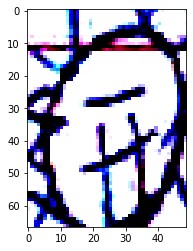


selected_tc_data
健


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


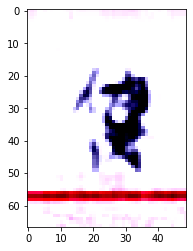

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



chr_data
陳


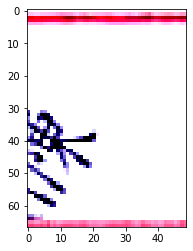

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



calli_data
翊


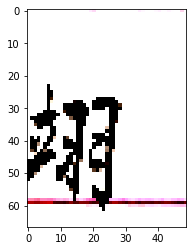

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



kanji_data
壽


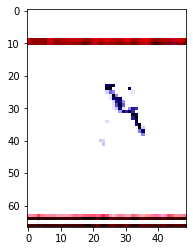

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



end of data
isnull


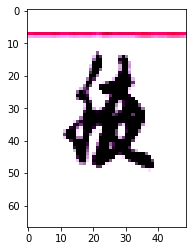

In [21]:
## unit test of EsunDataset
d = EsunDataset(train_data, transform=train_transform)
def show_sample(dataset, idx):
    print(idx2vocab[dataset[idx][1]])
    plt.imshow(dataset[idx][0].permute((1,2,0)))
    plt.show()
_offset = 32
print('train_data')
show_sample(d, _offset)    
print()
print('selected_tc_data')
show_sample(d, len(train_data)+7+_offset)    
print()
print('chr_data')
show_sample(d, len(train_data)+len(selected_tc_data)+10+_offset)    
print()
print('calli_data')
show_sample(d, len(train_data)+len(selected_tc_data)+len(chr_data)+10+_offset)    
print()
print('kanji_data')
show_sample(d, len(train_data)+len(selected_tc_data)+len(chr_data)+len(calli_data)+10+_offset)    
print()
print('end of data')
show_sample(d, -_offset)    
print()

In [22]:
BATCH_SIZE = 64
LEARNING_RATE = 0.0002
# VAL_SPLIT = .2

RANDOM_SEED= 618
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
pl.trainer.seed_everything(seed=RANDOM_SEED)

class EsunDataModule(pl.LightningDataModule):

    def __init__(self, batch_size=BATCH_SIZE, val_split=0.2):
        super().__init__()
        self.batch_size = batch_size
        # self.val_split = val_split
        self.train_transform = train_transform
        self.test_transform = test_transform

        if False:
            # 注意團隊的 Valid set 要一致
            _train_data, _valid_data = [x for i, x in enumerate(train_data) if i in train_indices], [x for i, x in enumerate(train_data) if i in valid_indices]
            assert len({'7300_莉.jpg', '57705_采.jpg', '56004_靖.jpg'}-set([x[0] for x in _valid_data]))==0 and len({'4302_蘭.jpg', '7716_薇.jpg', '24865_軒.jpg'}-set([x[0] for x in _train_data]))==0 # Sanity Check for all machines
        else:
            # 使用自己的 Valid set 
            _train_data = sorted([p.name for p in TRAIN_DATA_PATH.iterdir() if p.is_file()], key=get_file_index)
            train_indices, valid_indices = train_test_split([get_file_index(x) for x in _train_data], stratify=[re.findall("\d+_(\w+).\w+", x)[0] for x in _train_data], test_size=0.13, random_state=RANDOM_SEED)
            train_indices, valid_indices = set(train_indices), set(valid_indices)
            del _train_data
            _train_data, _valid_data = [x for i, x in enumerate(train_data) if i in train_indices], [x for i, x in enumerate(train_data) if i in valid_indices]
        
        self.train_dataset = EsunDataset(data=_train_data, transform=train_transform)
        self.val_dataset = EsunDataset(data=_valid_data, transform=test_transform, if_test=True)

    def train_dataloader(self, batch_size=None, shuffle=True):
        return DataLoader(self.train_dataset, batch_size=self.batch_size if batch_size is None else batch_size, shuffle=shuffle)

    def val_dataloader(self, batch_size=None, shuffle=False):
        return DataLoader(self.val_dataset, batch_size=self.batch_size if batch_size is None else batch_size, shuffle=shuffle)

Global seed set to 618


In [23]:
class EsunModel(pl.LightningModule):
    
    def __init__(self, learning_rate=LEARNING_RATE):

        super().__init__()
        self.tik = time.time()

        self.learning_rate = learning_rate
        self.channels = 3
        self.width = WIDTH
        self.height = HEIGHT

        # resnet18_model = models.resnet18(pretrained=False)
        # resnet18_conv = nn.Sequential(*list(resnet18_model.children())[:-2])
        # self.conv = resnet18_conv 
        
        self.conv = nn.Sequential(
            nn.Conv2d(self.channels, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.fc = nn.Sequential(
            nn.Linear((512*4*3), 2048),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.Linear(2048, 1024),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.Linear(1024, NUM_CLASSES),
            nn.LogSoftmax(dim=1)
        )
        self.flatten = nn.Flatten()
        self._initialize_weights()


    def _initialize_weights(self) -> None:
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def loss(self, prediction, ground_truth):
        return F.nll_loss(prediction, ground_truth)

    def forward(self, img):
        conv = self.conv(img)
        # print(conv.shape)
        out = self.fc(self.flatten(conv))
        return out

    def training_step(self, batch, batch_idx):
        img, lbl, _ = batch

        # Forward pass
        outputs = self.forward(img)
        loss = self.loss(outputs, lbl)
        self.log('train_loss', loss, prog_bar=True)

        return loss

    def validation_step(self, batch, batch_idx):
        img, lbl, _ = batch

        # Forward pass
        outputs = self.forward(img)
        loss = self.loss(outputs, lbl)
        prob, pred = torch.max(torch.exp(outputs), 1)
        acc = (pred == lbl).sum().item() / len(pred)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

        return (prob, pred, lbl)

    def validation_epoch_end(self, validation_step_outputs):
        hit, cnt = 0, 0
        for (prob, pred, lbl) in validation_step_outputs:
            acc = (pred == lbl).sum().item()
            hit += acc
            cnt += len(pred)
        print(f"    =>   Validation Accuracy: {hit/cnt*100:.1f} %                       |  epoch time = {(time.time()-self.tik)/60:.1f} min\n")
        self.tik = time.time()


    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.4, patience=2, verbose=True)
        # scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[4,7,9,11], gamma=0.4, verbose=True)
        # return [optimizer], [scheduler]
        return {
            'optimizer': optimizer,
            'lr_scheduler': scheduler,
            'monitor': 'val_loss'
        }

In [24]:
TRAIN = True
NUM_EPOCHS = 100
MODEL_SAVE_NAME = 'esun_2021_model_weights'

dm = EsunDataModule()
model = EsunModel()

if TRAIN:
    logger = TensorBoardLogger('tb_logs', name='my_esun_model')
    early_stop_callback = EarlyStopping(
        min_delta=0.001,
        patience=4,
        verbose=False,
        monitor='val_acc',
        mode='max'
    )
    checkpoint_callback = ModelCheckpoint(
        dirpath=MODEL_SAVE_PATH,
        filename=MODEL_SAVE_NAME,
        save_top_k=1,
        verbose=True,
        monitor='val_acc',
        mode='max'
    )
    trainer = pl.Trainer(max_epochs=NUM_EPOCHS, 
                        logger=logger, 
                        progress_bar_refresh_rate=20, 
                        gpus=-1 if torch.cuda.is_available() else 0, 
                        auto_lr_find=False,
                        callbacks=[early_stop_callback, checkpoint_callback])
    trainer.fit(model, dm)
    torch.save(model.state_dict(), MODEL_SAVE_PATH / ('pytorch_'+Path(trainer.checkpoint_callback.best_model_path).stem+'.pkl'))
    # lr_finder = trainer.tuner.lr_find(model, dm, max_lr=0.01, min_lr=1e-7)
    # fig = lr_finder.plot(suggest=True)
    # fig.show()
    # assert checkpoint_callback.best_model_score.item() < 0.034
    model = EsunModel.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
else:
    print(f"Reuse model: {str(MODEL_SAVE_PATH / MODEL_SAVE_NAME)+'.ckpt'}")
    model = EsunModel.load_from_checkpoint(str(MODEL_SAVE_PATH / MODEL_SAVE_NAME)+'.ckpt')

model.eval()
assert model.training is False
# torch.save(model.state_dict(), MODEL_SAVE_PATH / ('pytorch_'+MODEL_SAVE_NAME+'.pkl'))
# < 0.034

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory /content/gdrive/MyDrive/esun_2021_model exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | conv    | Sequential | 4.7 M 
1 | fc      | Sequential | 15.5 M
2 | flatten | Flatten    | 0     
---------------------------------------
20.2 M    Trainable params
0         Non-trainable params
20.2 M    Total params
80.774    Total estimated model params size (MB)


Global seed set to 618


    =>   Validation Accuracy: 0.0 %                       |  epoch time = 0.2 min



Epoch 0, global step 1470: val_acc reached 0.13963 (best 0.13963), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 14.0 %                       |  epoch time = 4.4 min



Epoch 1, global step 2941: val_acc reached 0.54802 (best 0.54802), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 54.8 %                       |  epoch time = 4.0 min



Epoch 2, global step 4412: val_acc reached 0.68195 (best 0.68195), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 68.2 %                       |  epoch time = 4.0 min



Epoch 3, global step 5883: val_acc reached 0.75696 (best 0.75696), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 75.7 %                       |  epoch time = 4.0 min



Epoch 4, global step 7354: val_acc reached 0.77283 (best 0.77283), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 77.3 %                       |  epoch time = 4.0 min



Epoch 5, global step 8825: val_acc reached 0.80145 (best 0.80145), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 80.1 %                       |  epoch time = 4.0 min



Epoch 6, global step 10296: val_acc reached 0.82169 (best 0.82169), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 82.2 %                       |  epoch time = 4.0 min



Epoch 7, global step 11767: val_acc reached 0.83052 (best 0.83052), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 83.1 %                       |  epoch time = 4.0 min



Epoch 8, global step 13238: val_acc reached 0.83566 (best 0.83566), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 83.6 %                       |  epoch time = 4.0 min



Epoch 9, global step 14709: val_acc reached 0.84025 (best 0.84025), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 84.0 %                       |  epoch time = 4.0 min



Epoch 10, global step 16180: val_acc reached 0.84226 (best 0.84226), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 84.2 %                       |  epoch time = 4.0 min



Epoch 11, global step 17651: val_acc reached 0.85154 (best 0.85154), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 85.2 %                       |  epoch time = 4.0 min



Epoch 12, global step 19122: val_acc was not in top 1


    =>   Validation Accuracy: 85.1 %                       |  epoch time = 4.0 min



Epoch 13, global step 20593: val_acc reached 0.85735 (best 0.85735), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 85.7 %                       |  epoch time = 4.0 min



Epoch 14, global step 22064: val_acc reached 0.85757 (best 0.85757), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 85.8 %                       |  epoch time = 4.0 min

Epoch    15: reducing learning rate of group 0 to 8.0000e-05.


Epoch 15, global step 23535: val_acc reached 0.87915 (best 0.87915), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 87.9 %                       |  epoch time = 4.0 min



Epoch 16, global step 25006: val_acc was not in top 1


    =>   Validation Accuracy: 87.8 %                       |  epoch time = 4.0 min



Epoch 17, global step 26477: val_acc was not in top 1


    =>   Validation Accuracy: 87.5 %                       |  epoch time = 4.0 min

Epoch    18: reducing learning rate of group 0 to 3.2000e-05.


Epoch 18, global step 27948: val_acc reached 0.88206 (best 0.88206), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 88.2 %                       |  epoch time = 4.0 min



Epoch 19, global step 29419: val_acc reached 0.88418 (best 0.88418), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 88.4 %                       |  epoch time = 4.0 min



Epoch 20, global step 30890: val_acc was not in top 1


    =>   Validation Accuracy: 88.3 %                       |  epoch time = 4.0 min

Epoch    21: reducing learning rate of group 0 to 1.2800e-05.


Epoch 21, global step 32361: val_acc reached 0.88631 (best 0.88631), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 88.6 %                       |  epoch time = 4.0 min



Epoch 22, global step 33832: val_acc reached 0.88664 (best 0.88664), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 88.7 %                       |  epoch time = 4.0 min



Epoch 23, global step 35303: val_acc reached 0.88709 (best 0.88709), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 88.7 %                       |  epoch time = 4.0 min

Epoch    24: reducing learning rate of group 0 to 5.1200e-06.


Epoch 24, global step 36774: val_acc was not in top 1


    =>   Validation Accuracy: 88.6 %                       |  epoch time = 4.0 min



Epoch 25, global step 38245: val_acc reached 0.88865 (best 0.88865), saving model to "/content/gdrive/MyDrive/esun_2021_model/esun_2021_model_weights-v2.ckpt" as top 1


    =>   Validation Accuracy: 88.9 %                       |  epoch time = 4.0 min



Epoch 26, global step 39716: val_acc was not in top 1


    =>   Validation Accuracy: 88.5 %                       |  epoch time = 4.0 min

Epoch    27: reducing learning rate of group 0 to 2.0480e-06.


Epoch 27, global step 41187: val_acc was not in top 1


    =>   Validation Accuracy: 88.8 %                       |  epoch time = 4.0 min



Epoch 28, global step 42658: val_acc was not in top 1


    =>   Validation Accuracy: 88.9 %                       |  epoch time = 4.0 min



Epoch 29, global step 44129: val_acc was not in top 1


    =>   Validation Accuracy: 88.8 %                       |  epoch time = 3.9 min

Epoch    30: reducing learning rate of group 0 to 8.1920e-07.



In [ ]:
# Start tensorboard
%reload_ext tensorboard
%tensorboard --logdir tb_logs

<IPython.core.display.Javascript object>

In [ ]:
result = {k: {'hit': 0, 'count': 0, 'prob': list(), 'mistake': dict()} for k in vocab2idx.keys()} # '好': {'hit': 3, 'count': 20, 'mistake': {'如': 3, '紓': 2}} <- acc = 3 / 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_step = len(dm.val_dataloader())
val_result = {'pred': list(), 'prob': list(), 'label': list()}
val_miss_result = []
hit, cnt = 0, 0
for i, (img, lbl, file_idx) in enumerate(dm.val_dataloader()):
    if (i+1) % int(n_step/4) == 0:
        print(f"{(i+1) // int(n_step/4)} / 4")
    out = model.to(device).forward(img.to(device))
    prob, pred = torch.max(torch.exp(out).to('cpu'), 1)
    val_result['pred'].extend(pred.tolist())
    val_result['prob'].extend(prob.tolist())
    val_result['label'].extend(lbl.tolist())
    acc = (pred == lbl).sum().item()
    hit += acc
    cnt += len(pred)
    for pb, p, l, f_idx in zip(prob, pred, lbl, file_idx):
        pred_chr, label_chr = idx2vocab[p.item()], idx2vocab[l.item()]
        d = result[label_chr]
        d['count'] += 1
        if pred_chr == label_chr:
            d['hit'] += 1
            d['prob'].append(pb.item())
        else:
            d['mistake'][pred_chr] = d['mistake'].get(pred_chr, 0) + 1
            val_miss_result.append((f_idx.item(), pred_chr, pb.item(), label_chr))
val_result = pd.DataFrame(val_result)
val_result['pred'] = val_result['pred'].map(idx2vocab)
val_result['label'] = val_result['label'].map(idx2vocab)
val_result['hit'] = val_result['pred'] == val_result['label']
print(f"        Validation Accuracy: {hit/cnt*100:.1f} %")
for k, v in result.items():
    if len(v['prob']) == 0:
        v['prob'] = -1
    else:
        v['prob'] = sum(v['prob']) / len(v['prob'])

1 / 4
2 / 4
3 / 4
4 / 4
        Validation Accuracy: 88.3 %


prob
(0.0512, 0.147]    0.000000
(0.147, 0.242]     0.042254
(0.242, 0.336]     0.115044
(0.336, 0.431]     0.237179
(0.431, 0.526]     0.290123
(0.526, 0.621]     0.389189
(0.621, 0.716]     0.466667
(0.716, 0.81]      0.612069
(0.81, 0.905]      0.704819
(0.905, 1.0]       0.971222
dtype: float64


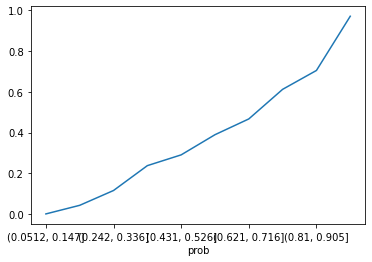

In [ ]:
print(val_result.groupby(pd.cut(val_result['prob'], bins=10)).apply(lambda df: sum(df['hit'])/len(df)))
val_result.groupby(pd.cut(val_result['prob'], bins=10)).apply(lambda df: sum(df['hit'])/len(df)).plot()

In [ ]:
for i, (c, d) in enumerate(result.items()):
    if i > 500: break
    if d['hit']/d['count'] < 0.5:
        print(f"{c}:   {d['hit']/d['count']*100:.1f} %  |  count: {d['count']}  |  avg prob: {d['prob']:.2f}")

仙:   33.3 %  |  count: 3  |  avg prob: 0.37


In [ ]:
# for i, (train_data_idx, pred, prob, lbl) in enumerate(val_miss_result):
#     if prob > 0.95:
#         print(i)

Pred:  廈 84.4%
Ans :  廣 ( 133_廣.jpg )


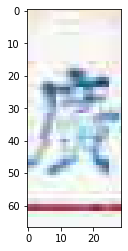

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


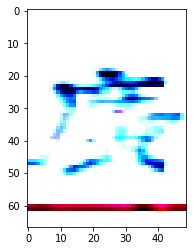


Pred:  管 91.3%
Ans :  營 ( 691_營.jpg )


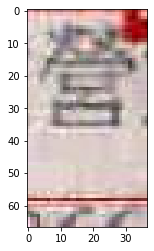

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


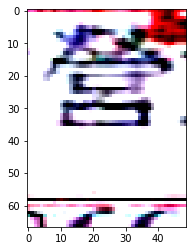


Pred:  家 98.0%
Ans :  毅 ( 738_毅.jpg )


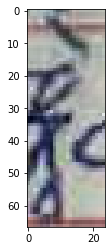

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


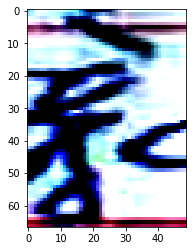


Pred:  藍 84.0%
Ans :  基 ( 991_基.jpg )


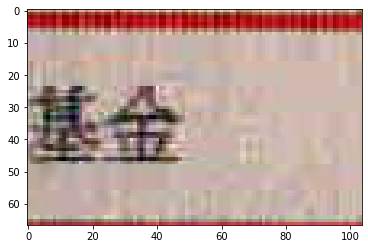

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


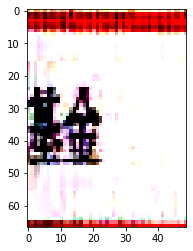


Pred:  千 87.7%
Ans :  平 ( 1089_平.jpg )


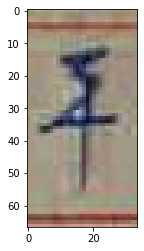

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


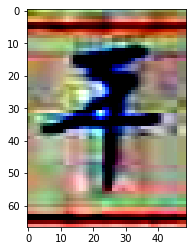


Pred:  宥 98.6%
Ans :  睿 ( 1504_睿.jpg )


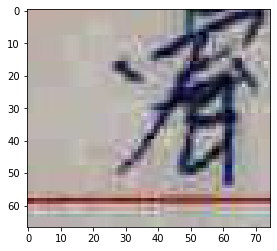

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


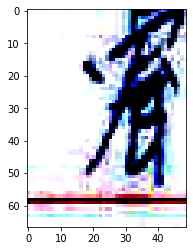


Pred:  楊 98.9%
Ans :  揚 ( 1637_揚.jpg )


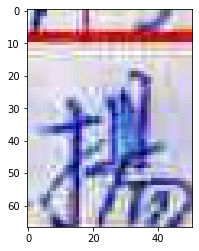

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


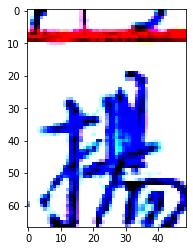


Pred:  士 95.4%
Ans :  土 ( 1759_土.jpg )


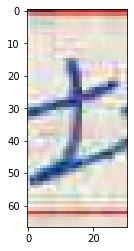

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


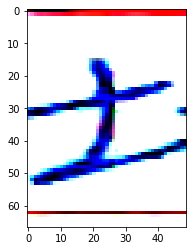


Pred:  賀 96.2%
Ans :  智 ( 1806_智.jpg )


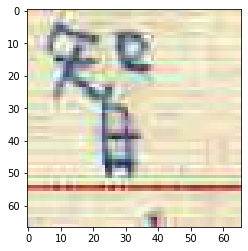

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


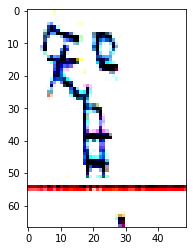


Pred:  揚 93.7%
Ans :  楊 ( 1866_楊.jpg )


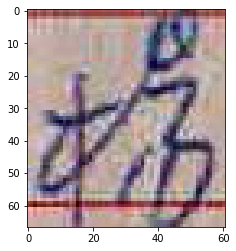

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


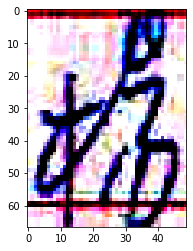


Pred:  陞 84.8%
Ans :  登 ( 2130_登.jpg )


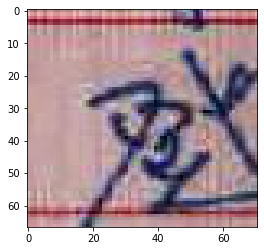

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


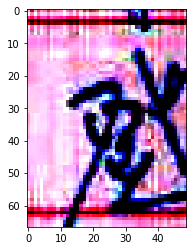


Pred:  愛 86.2%
Ans :  復 ( 2493_復.jpg )


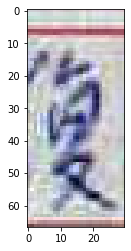

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


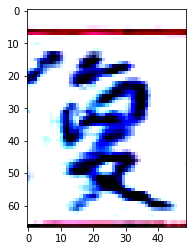


Pred:  兆 97.2%
Ans :  桃 ( 2581_桃.jpg )


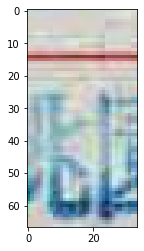

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


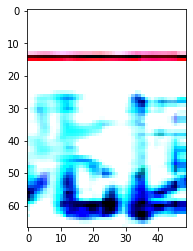


Pred:  峰 82.6%
Ans :  鋒 ( 2816_鋒.jpg )


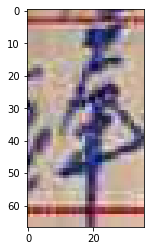

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


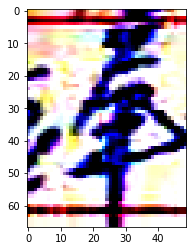


Pred:  涵 99.0%
Ans :  泓 ( 2953_泓.jpg )


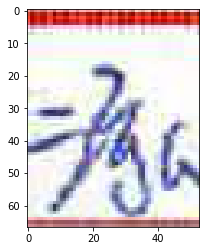

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


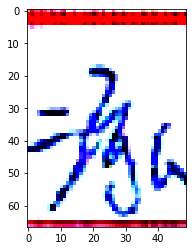


Pred:  戶 84.1%
Ans :  基 ( 3044_基.jpg )


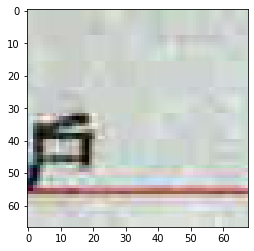

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


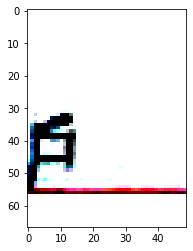


Pred:  酒 88.1%
Ans :  坊 ( 3104_坊.jpg )


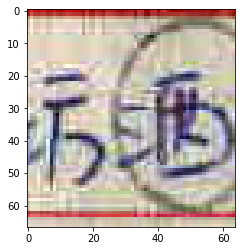

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


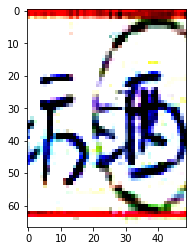


Pred:  力 84.9%
Ans :  材 ( 3149_材.jpg )


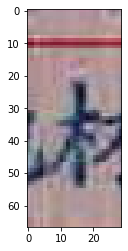

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


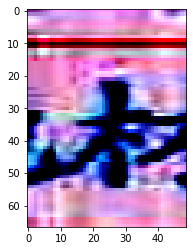


Pred:  策 91.7%
Ans :  榮 ( 3174_榮.jpg )


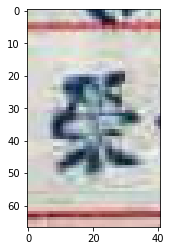

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


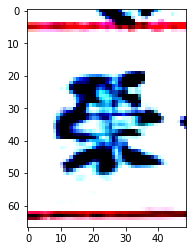


Pred:  閔 96.3%
Ans :  傑 ( 3176_傑.jpg )


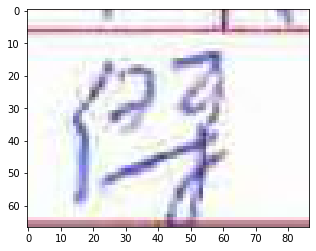

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


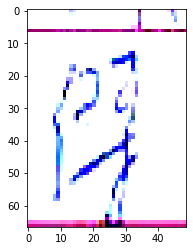


Pred:  銷 85.9%
Ans :  鉅 ( 3264_鉅.jpg )


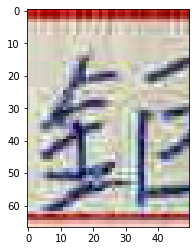

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


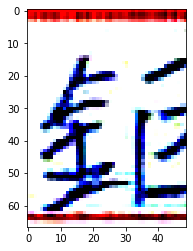


Pred:  皇 98.8%
Ans :  室 ( 3376_室.jpg )


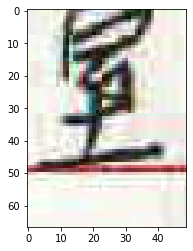

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


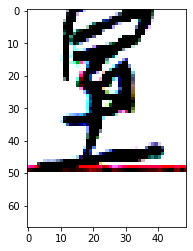


Pred:  室 83.1%
Ans :  星 ( 3691_星.jpg )


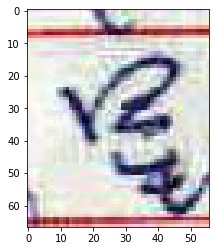

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


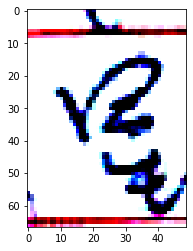


Pred:  素 86.9%
Ans :  業 ( 3930_業.jpg )


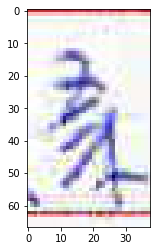

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


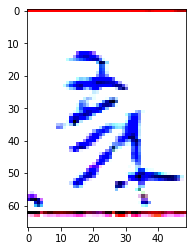


Pred:  限 85.4%
Ans :  股 ( 4019_投.jpg )


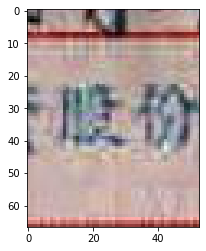

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


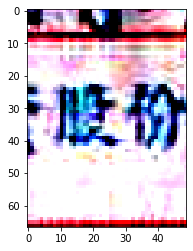


Pred:  宏 80.3%
Ans :  交 ( 4041_交.jpg )


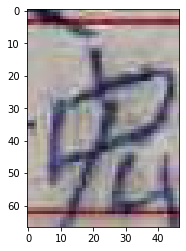

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


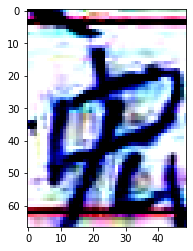


Pred:  企 98.8%
Ans :  發 ( 4045_發.jpg )


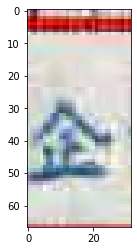

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


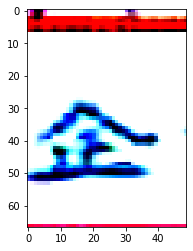


Pred:  海 94.8%
Ans :  益 ( 4745_益.jpg )


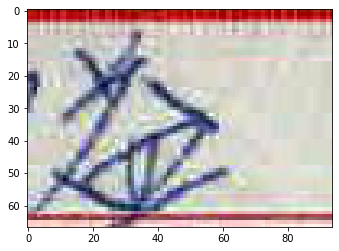

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


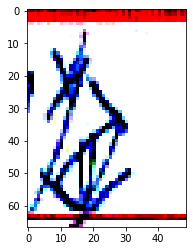


Pred:  木 99.4%
Ans :  isnull ( 4747_程.jpg )


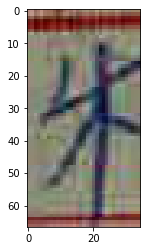

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


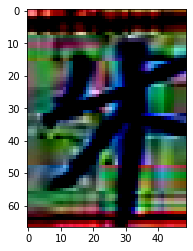


Pred:  專 92.7%
Ans :  勳 ( 5205_勳.jpg )


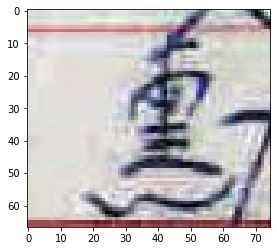

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


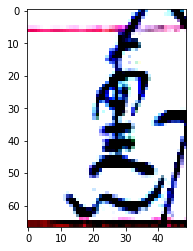


Pred:  廈 89.0%
Ans :  霞 ( 5413_霞.jpg )


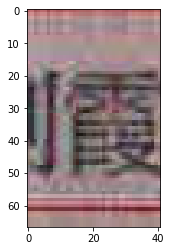

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


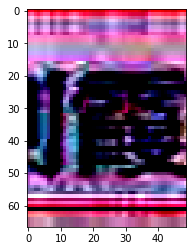


Pred:  久 88.6%
Ans :  人 ( 5609_人.jpg )


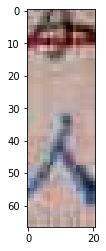

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


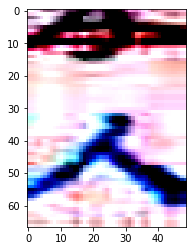


Pred:  能 82.0%
Ans :  紹 ( 5694_紹.jpg )


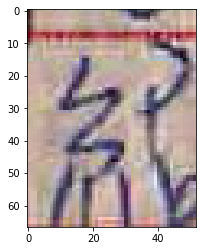

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


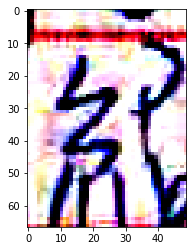


Pred:  幸 85.2%
Ans :  壽 ( 5735_壽.jpg )


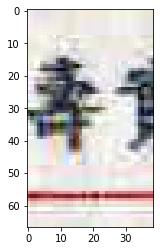

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


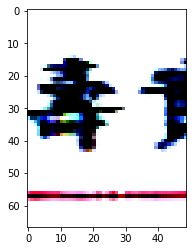


Pred:  芸 95.1%
Ans :  芝 ( 6264_芝.jpg )


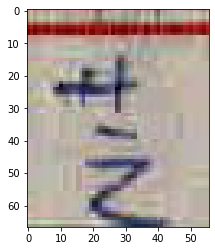

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


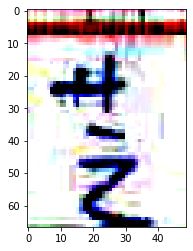


Pred:  忠 97.8%
Ans :  虹 ( 6765_虹.jpg )


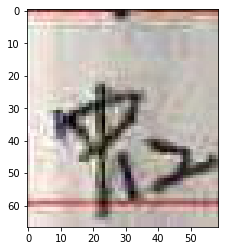

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


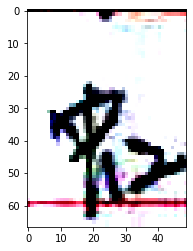


Pred:  毅 82.5%
Ans :  建 ( 7108_建.jpg )


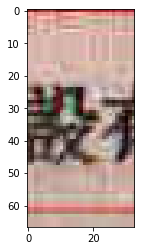

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


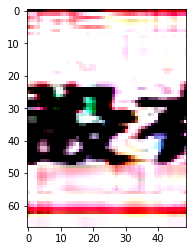


Pred:  易 97.7%
Ans :  揚 ( 7273_揚.jpg )


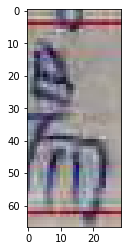

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


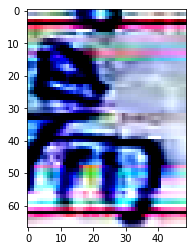


Pred:  裕 91.2%
Ans :  魏 ( 7482_魏.jpg )


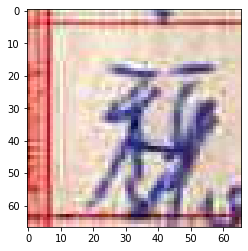

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


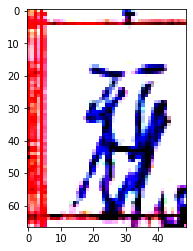


Pred:  isnull 93.6%
Ans :  銷 ( 7641_銷.jpg )


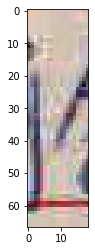

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


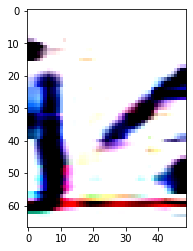


Pred:  isnull 88.5%
Ans :  川 ( 7909_川.jpg )


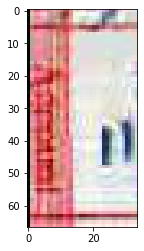

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


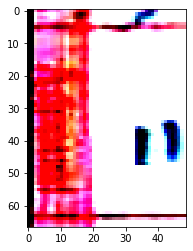


Pred:  館 98.7%
Ans :  會 ( 8043_會.jpg )


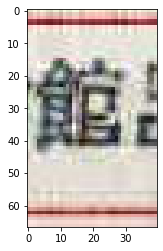

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


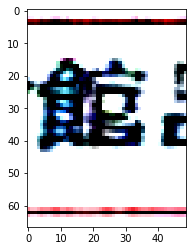


Pred:  行 94.2%
Ans :  具 ( 8129_具.jpg )


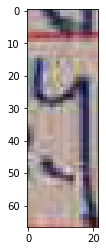

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


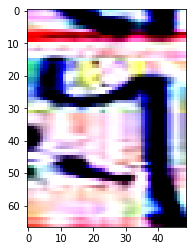


Pred:  士 85.1%
Ans :  土 ( 8348_土.jpg )


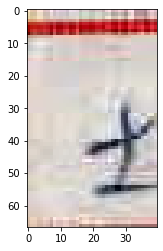

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


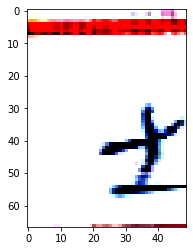


Pred:  子 86.2%
Ans :  王 ( 8353_王.jpg )


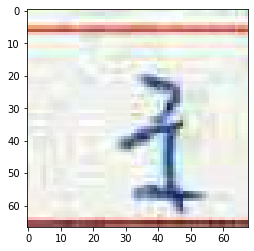

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


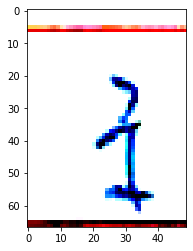


Pred:  慈 84.0%
Ans :  寧 ( 8728_寧.jpg )


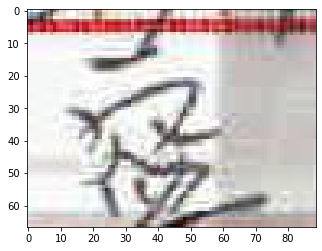

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


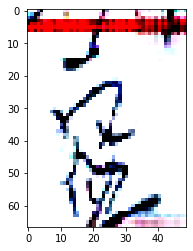


Pred:  建 95.1%
Ans :  連 ( 8738_連.jpg )


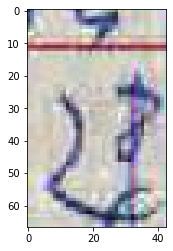

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


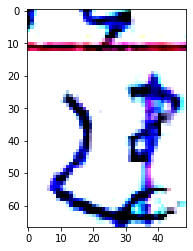


Pred:  體 99.6%
Ans :  麗 ( 8740_可.jpg )


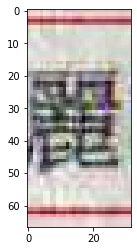

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


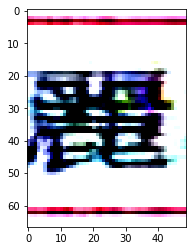


Pred:  旅 99.1%
Ans :  之 ( 8847_之.jpg )


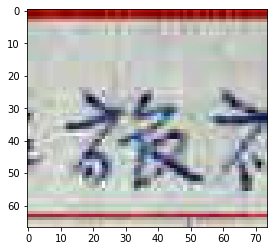

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


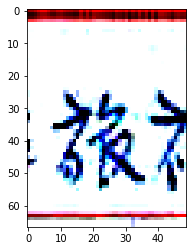


Pred:  農 90.4%
Ans :  憲 ( 8864_憲.jpg )


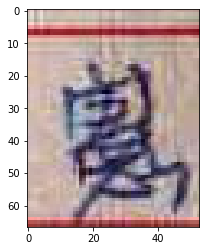

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


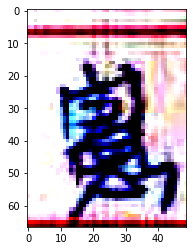


Pred:  軒 81.1%
Ans :  彩 ( 9168_彩.jpg )


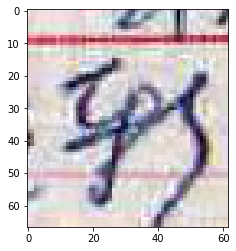

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


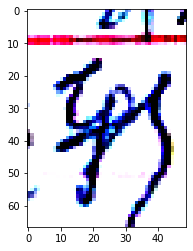


Pred:  珠 86.2%
Ans :  妹 ( 9223_妹.jpg )


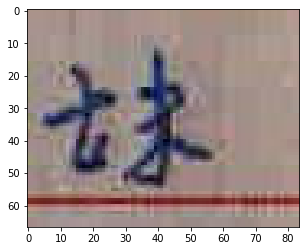

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


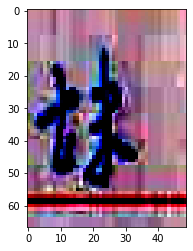


Pred:  交 90.0%
Ans :  介 ( 9278_介.jpg )


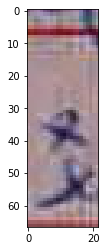

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


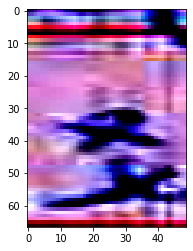


Pred:  力 82.9%
Ans :  isnull ( 9600_久.jpg )


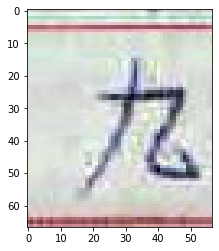

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


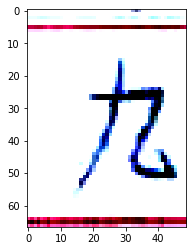


Pred:  凍 95.1%
Ans :  東 ( 9807_東.jpg )


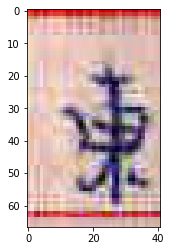

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


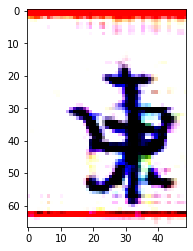


Pred:  登 82.1%
Ans :  鄧 ( 9834_鄧.jpg )


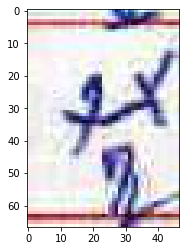

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


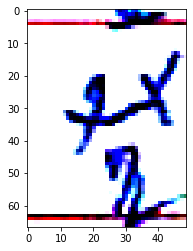


Pred:  茂 95.0%
Ans :  茹 ( 9842_茹.jpg )


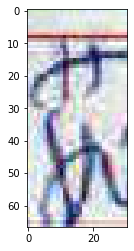

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


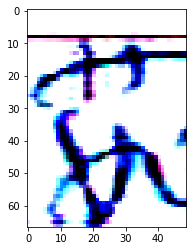


Pred:  蓉 97.0%
Ans :  寬 ( 9902_寬.jpg )


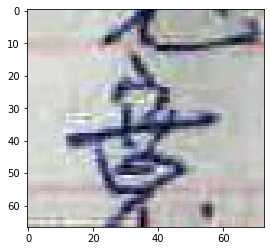

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


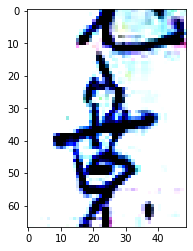


Pred:  醫 99.3%
Ans :  大 ( 10054_大.jpg )


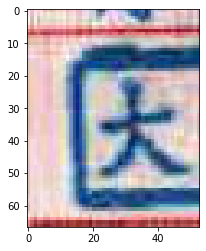

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


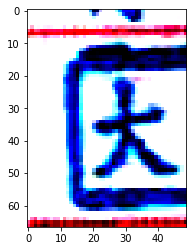


Pred:  開 98.9%
Ans :  關 ( 10265_關.jpg )


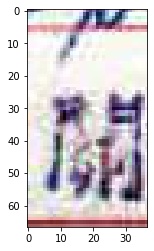

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


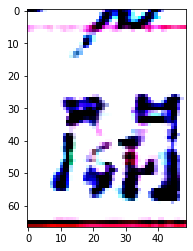


Pred:  詮 95.3%
Ans :  證 ( 10410_證.jpg )


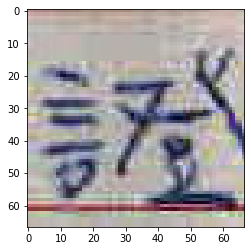

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


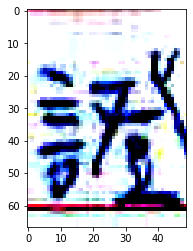

In [ ]:
_max_cnt = 60
_cnt = 0
for idx, (train_data_idx, pred, prob, lbl) in enumerate(val_miss_result):
    if prob < 0.8: continue
    if _cnt > _max_cnt: break
    _cnt += 1
    train_data_idx, pred, prob, lbl = val_miss_result[idx]
    img = io.imread(TRAIN_DATA_PATH / train_data[train_data_idx][0])
    trafo_img = test_transform(image=img)['image']
    print("Pred: ", pred, f"{prob*100:.1f}%")
    print("Ans : ", lbl, "(", train_data[train_data_idx][0], ")")
    plt.imshow(img)
    plt.show()
    plt.imshow(trafo_img.permute((1,2,0)))
    plt.show()
    print()
# out = model.to(device).forward(img.to(device).unsqueeze(0))
# prob, pred = torch.max(torch.exp(out.to('cpu')), 1)
# print("Pred: ", idx2vocab[pred.item()], f"{prob.item()*100:.1f}%")
# print("Ans : ", idx2vocab[lbl])

In [25]:
## all data 
all_dataset = EsunDataset(data=train_data, transform=test_transform, if_test=True)
all_dataloader = DataLoader(all_dataset, batch_size=256, shuffle=False)

all_result = {k: {'hit': 0, 'count': 0, 'prob': list(), 'mistake': dict()} for k in vocab2idx.keys()} # '好': {'hit': 3, 'count': 20, 'mistake': {'如': 3, '紓': 2}} <- acc = 3 / 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_step = len(all_dataloader)
all_miss_result = []
hit, cnt = 0, 0
for i, (img, lbl, file_idx) in enumerate(all_dataloader):
    if (i+1) % int(n_step/6) == 0:
        print(f"{(i+1) // int(n_step/6)} / 6")
    out = model.to(device).forward(img.to(device))
    prob, pred = torch.max(torch.exp(out).to('cpu'), 1)
    acc = (pred == lbl).sum().item()
    hit += acc
    cnt += len(pred)
    for pb, p, l, f_idx in zip(prob, pred, lbl, file_idx):
        pred_chr, label_chr = idx2vocab[p.item()], idx2vocab[l.item()]
        d = all_result[label_chr]
        d['count'] += 1
        if pred_chr == label_chr:
            d['hit'] += 1
            d['prob'].append(pb.item())
        else:
            d['mistake'][pred_chr] = d['mistake'].get(pred_chr, 0) + 1
            all_miss_result.append((f_idx.item(), pred_chr, pb.item(), label_chr))
print(f"        Training + Validation Accuracy: {hit/cnt*100:.1f} %")
for k, v in all_result.items():
    if len(v['prob']) == 0:
        v['prob'] = -1
    else:
        v['prob'] = sum(v['prob']) / len(v['prob'])

1 / 6
2 / 6
3 / 6
4 / 6
5 / 6
6 / 6
        Training + Validation Accuracy: 98.8 %


In [ ]:
for i, (c, d) in enumerate(all_result.items()):
    # if i > 1000: break
    if d['hit']/d['count'] < 0.5:
        print(f"{c}:   {d['hit']/d['count']*100:.1f} %  |  count: {d['count']}  |  avg prob: {d['prob']:.2f}")

In [ ]:
m = confusion_matrix(y_true=[x[3] for x in all_miss_result], y_pred=[x[1] for x in all_miss_result], labels=list(VOCAB))
_conf_char_set = set()
for i, v in enumerate(list(VOCAB)):
    if (m[i] > 2).sum() > 0:
        print(v, [list(VOCAB)[j] for j, b in enumerate(m[i] > 2) if b])
        _conf_char_set.add(v)
        _conf_char_set = _conf_char_set.union(set([list(VOCAB)[j] for j, b in enumerate(m[i] > 2) if b]))

士 ['土']


In [ ]:
print(_conf_char_set)

{'巧', '姜', '善', '珠', '行', '妹', '土', '北', '兆', '士'}


In [ ]:
_cnt = 0
for i, (train_data_idx, pred, prob, lbl) in enumerate(all_miss_result):
    if prob < 0.018:
        # print(i)
        _cnt += 1
print(_cnt)

764


In [ ]:
## 記下不一樣的，剩下的都預設是對的
train_data_idx_start = 0
_max_cnt = 10000
_cnt = 0
for idx, (train_data_idx, pred, prob, lbl) in enumerate(all_miss_result):
    if prob > 0.018 or train_data_idx < train_data_idx_start: continue
    if train_data_idx in KEEP_TRAIN_DATA_IDX or train_data_idx in RESOLVE: continue
    if _cnt > _max_cnt: break
    _cnt += 1
    img = io.imread(TRAIN_DATA_PATH / train_data[train_data_idx][0])
    # trafo_img = test_transform(image=img)['image']
    print("Pred: ", pred, f"{prob*100:.1f}%")
    print("Ans : ", lbl, "(", train_data[train_data_idx][0], ")")
    plt.imshow(img)
    plt.show()
    # # plt.imshow(trafo_img.permute((1,2,0)))
    # # plt.show()
    # print()
## 

NameError: ignored

In [ ]:
'途' in VOCAB

In [ ]:
KEEP_TRAIN_DATA_IDX = set([32,43,274,335,415,420,453,457,471,477,533,654,666,691,706,717,752,808,937,982,991,1148,1177,1306,1405,1469,1504,1637,1814,1887,1960,1968,2020,2085,2129,2212,2341,2466,2493,2490,
2639,3003,3032,3158,3557,3893,3900,4003,4074,4254,4485,4488,4683,4764,4780,
4843,5087,5175,5319,5474,5533,5618,5777,5885,6024,6190,6214,6274,6310,6347,6518,6622,6675,6765,6824,6983,7016,7024,7035,7038,7043,7064,7076,7395,7410,7540,7705,7775,7812,7830,7865,7984,8266,8305,8322,8436,8481,8573,
8603,8672,8685,8732,8994,9210,9237,9369,9410,9496,9630,9669,9688,9806,9829,9938,9963,10069,10075,10116,10324,10533,10945,10964,11014,11100,11101,10175,11196,11217,11393,11466,11506,
11640,11672,11714,11727,11770,11866,12011,
12199,12232,12600,12607,12711,12782,12969,12984,13026,13211,13333,13469,13479,13647,13682,13814,13933,13946,14187,14364,14378,14421,14578,14690,14903,14945,14957,15011,15020,15024,15173,15362,
15409,15593,15615,15648,15684,15690,15694,15711,15841,16007,16064,16206,16236,16263,16380,16389,16417,16418,16514,16568,16715,16745,16773,16865,16926,17039,17058,17325,17330,17431,17460,17534,17684,17751,17919,
17862,17947,18028,18192,18227,18338,18350,18460,18575,18696,18753,18822,18844,19011,19086,19246,19301,19352,19364,19519,19605,19785,19787,19948,19951,20004,20123,20225,20382,20417,20449,20482,20821,20925,20985,21148,
21229,21233,21293,21324,21427,21439,21499,21595,21679,21777,21781,21835,21892,21948,22055,22181,22212,22440,22556,22572,22719,22764,22963,23017,23086,23230,23317,23358,23417,23483,23506,23525,23745,23772,23817,23854,24039,
24106,24129,24169,24256,24295,24478,24711,24751,24923,25012,25019,25194,25196,25427,25485,25508,25696,25877,25898,25958,26269,26316,26345,26542,26595,26881,26908,27048,27053,27058,
27132,27288,27490,
27788,27877,27921,27925,27927,28016,28027,28095,28113,28161,28197,28281,28442,28450,28549,28563,28672,28774,28918,29036,29125,29302,29458,29472,29606,29608,29697,30060,30076,30074,30090,
30223,30241,30386,
30722,31219,31244,31464,31472,31494,31813,31872,31934,32043,32053,32113,32291,32519,32783,32803,32813,32898,33386,33585,33721,33857,33946,34114,34196,34332,34428,34525,34651,34806,
34842,34935,34955,35094,35149,35283,35402,35461,35491,35547,35781,35978,36065,36255,36277,36431,36451,36578,36622,36624,36647,36814,36824,37034,
37095,37398,37253,37732,37744,37782,37954,38066,38521,38559,38977,38982,39046,39370,39400,39752,39780,39924,40215,40226,40444,40476,40506,40625,40647,40702,40839,40893,40943,41117,41156,41241,
41456,41509,41596,41875,41989,42215,42615,42718,42722,42803,42870,43343,43567,43644,43848,44101,44130,44259,44814,43965,44035,44273,44616,44829,44927,45402,45313,45426,45471,45537,45675,
45786,45910,46178,46312,46663,46698,46889,47200,47220,47251,47292,47403,47488,47535,47695,47753,47769,47828,48157,48261,48519,48587,48638,48774,48862,48909,48925,49486,49511,49521,
49596,49720,49735,49814,49832,50112,50298,50369,50407,50413,50421,50628,50816,50863,51441,51534,51536,51626,51689,52030,52330,52438,52494,52504,52874,52995,53052,53081,53254,53398,53454,53517,
53582,53683,53778,53871,54597,54612,54625,54682,54735,54767,54907,55191,55346,55506,55652,55811,55829,55853,55861,55875,55982,56015,56127,56167,56238,56244,56283,56500,56535,56592,56642,56669,
56794,56862,56982,57064,57123,57268,57313,57398,57429,57537,57723,57756,57838,57856,58245,58524,58664,58737,58921,58987,59021,59050,59135,59316,59346,59398,59416,59636,59746,59761,
59793,59824,60350,60489,60672,61053,61056,61088,61093,61118,61293,61310,61341,61584,61628,61655,61776,61942,62170,62197,62581,62614,62881,62961,63013,63145,
63233,63336,63458,63928,63948,64048,64181,64182,64256,64504,64587,64698,64893,64931,65183,65210,65317,65436,65604,65607,65617,65763,65833,65924,65933,66046,66120,66140,66249,66452,66621,66646,
66722,66753,67044,67045,67109,67219,67247,67281,67290,67378,67414,67503,67505,67546,67563,67923,68048,68459,68538,68713])
FIX_DICT = {277:'茂',411:'isnull',421:'理',465:'限',474:'有',631:'專',735:'isnull',922:'所',1064:'院',1163:'委',1233:'isnull',1606:'限',1788:'公',1965:'委',2022:'大',2249:'潔',2741:'isnull',
3289:'行',3433:'統',3436:'isnull',3598:'司',3984:'汽',4408:'股',4517:'物',4878:'公',4944:'廈',5339:'調',5425:'家',5527:'委',5629:'統',6576:'司',6655:'財',6869:'名',7123:'建',
7141:'習',7317:'基',7397:'司',8051:'有',8610:'湖',8957:'理',9032:'造',9231:'物',9658:'料',9819:'盛',9853:'山',9904:'管',10266:'有',10527:'司',10810:'股',10958:'物',11386:'統',11628:'銀',
11761:'建',12009:'公',12111:'金',12296:'保',12420:'公',12676:'理',12903:'有',13418:'款',13511:'公',13601:'國',13791:'得',14155:'行',14320:'會',14564:'公',14710:'司',14794:'企',
14967:'科',15467:'設',15811:'行',16024:'公',16157:'心',16674:'洋',16800:'有',16991:'行',17225:'科',17260:'法',17346:'司',17584:'有',17595:'司',18074:'工',18204:'專',18308:'法',
18335:'會',18449:'銀',18735:'禾',18785:'醫',18812:'技',19324:'有',19560:'建',19902:'限',20020:'銀',20049:'限',20228:'家',20472:'行',20576:'行',20695:'文',21398:'技',21571:'會',
21929:'行',22276:'公',22526:'公',22666:'銀',22889:'團',23109:'司',24465:'醫',24666:'醫',24828:'建',24851:'限',25028:'公',25089:'戶',25155:'材',25346:'基',25432:'有',25848:'行',
26035:'公',26052:'有',26568:'分',27152:'銀',27218:'有',27349:'所',27368:'德',27446:'限',27933:'合',28234:'銀',28286:'造',28416:'員',28532:'企',28649:'理',28760:'儀',28784:'行',
28833:'銀',29124:'會',29325:'行',29352:'生',29592:'限',29629:'份',30369:'造',30419:'造',30483:'基',30537:'委',30585:'民',30849:'材',30865:'汽',31002:'員',31182:'股',31756:'合',
31794:'社',31992:'專',32050:'術',32698:'司',33051:'限',33057:'會',33130:'行',33308:'權',33311:'限',33489:'有',33571:'建',33660:'有',33865:'行',33997:'台',34406:'行',34450:'之',
34530:'樂',34734:'療',35251:'有',35279:'醫',35336:'強',35536:'新',35589:'問',35915:'雄',36224:'物',36449:'廈',37393:'費',37771:'合',37795:'技',37868:'醫',38047:'公',38723:'股',
38811:'問',39027:'銀',39165:'行',39484:'戶',39558:'銀',39984:'財',39988:'有',40106:'有',40113:'有',40630:'銀',40983:'技',40993:'理',41028:'容',41093:'汽',41238:'裝',42077:'專',
43059:'有',43177:'份',43389:'麻',43397:'會',44206:'限',44555:'綜',44969:'有',45244:'款',45514:'基',45658:'行',45798:'檢',45879:'院',46062:'系',46156:'社',46356:'行',46463:'問',
46714:'汽',46801:'材',46998:'專',47246:'限',47757:'樓',48148:'款',48214:'戶',48537:'行',48580:'新',48599:'保',48860:'會',48937:'份',49173:'股',49701:'院',49889:'有',50163:'大',
50193:'客',50522:'材',50640:'管',51063:'禾',51119:'有',51125:'股',51641:'限',51783:'銷',51929:'金',52097:'社',52127:'品',52198:'科',52235:'大',52679:'科',52745:'廈',52780:'合',
53088:'委',53125:'行',53445:'行',53584:'限',53751:'山',54109:'小',54193:'會',54248:'社',54335:'有',54551:'銀',54777:'大',55367:'有',55405:'昇',55518:'局',55552:'款',56055:'金',
56126:'社',56215:'限',56437:'大',56460:'金',56525:'合',56533:'管',56701:'統',56730:'款',56856:'員',57022:'行',57248:'有',57529:'銀',57873:'行',57936:'大',58121:'有',58609:'律',
59029:'理',59075:'法',59107:'員',59152:'商',59855:'有',60420:'限',61198:'有',61284:'禾',61418:'限',61574:'客',61770:'行',61813:'儀',61901:'餅',62250:'法',62655:'戶',62844:'款',
62870:'保',63128:'限',63513:'公',63586:'醫',63763:'合',64249:'造',64318:'限',64344:'股',65147:'銀',65212:'金',65426:'聯',65578:'公',65672:'公',65729:'元',65820:'計',65852:'材',
65930:'限',66346:'司',66514:'司',66520:'委',66582:'物',66692:'限',66772:'科',67406:'基',67539:'理',67567:'問',67694:'科',68061:'理',68165:'廈',68346:'德',68428:'行',68441:'系',
68635:'行',68676:'股'}
print(len(FIX_DICT))
print("Not in VOCAB:  ", set(FIX_DICT.values()).difference(VOCAB))

In [ ]:
NEW_RESOLVE = dict()
for idx, (train_data_idx, pred, prob, lbl) in enumerate(all_miss_result):
    if prob > 0.018 or train_data_idx in KEEP_TRAIN_DATA_IDX or train_data_idx in RESOLVE: continue
    # if train_data_idx > 28016: break
    if train_data_idx in FIX_DICT:
        if FIX_DICT[train_data_idx] in VOCAB:
            NEW_RESOLVE[train_data_idx] = FIX_DICT[train_data_idx]
        else:
            NEW_RESOLVE[train_data_idx] = NULL_CHR
    else:
        NEW_RESOLVE[train_data_idx] = pred
# NEW_RESOLVE
# for idx, lbl in NEW_RESOLVE.items():
#     # if not idx in FIX_DICT: continue
#     img = io.imread(TRAIN_DATA_PATH / train_data[idx][0])
#     print(train_data[idx][1], idx, "=>", lbl)
#     plt.imshow(img)
#     plt.show()

In [ ]:
print(len(NEW_RESOLVE))
NEW_RESOLVE.update(RESOLVE)
print(len(NEW_RESOLVE))
print(NEW_RESOLVE)

# 快車肉乾 ~

In [ ]:
!unzip -q '/content/gdrive/MyDrive/快車肉乾.zip'

unzip:  cannot find or open /content/gdrive/MyDrive/快車肉乾.zip, /content/gdrive/MyDrive/快車肉乾.zip.zip or /content/gdrive/MyDrive/快車肉乾.zip.ZIP.


In [ ]:
test_data_path = Path('./快車肉乾')
test_data = [(x.name, re.findall('ch_\d+_(\w).png', x.name)[0]) for x in test_data_path.iterdir() if x.is_file() and not x.name.startswith('sentence')]
test_data = sorted(test_data, key = lambda x: int(re.findall('ch_(\d+)_.+', x[0])[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9209 親 (ISNULL)


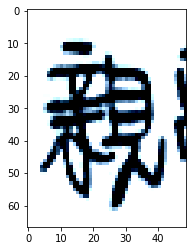

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


愛 0.9872 愛


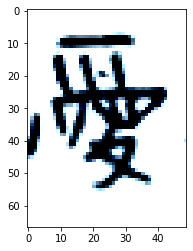

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9878 的 (ISNULL)


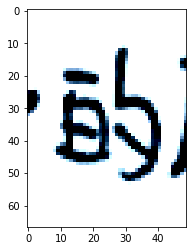

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


顧 0.9786 顧


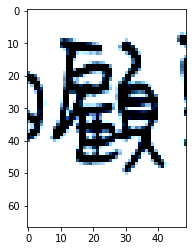

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


客 0.9772 客


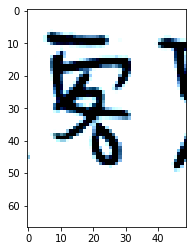

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.7107 您 (ISNULL)


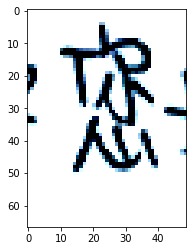

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


好 0.9545 好


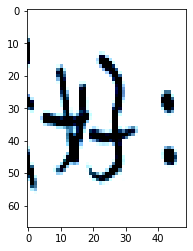

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9222 蝦 (ISNULL)


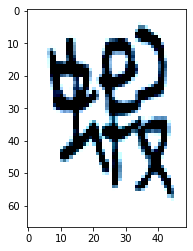

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.7615 皮 (ISNULL)


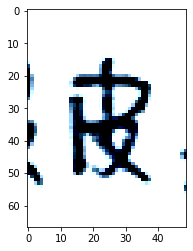

isnull 0.9167 購 (ISNULL)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


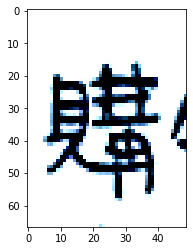

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


物 0.9833 物


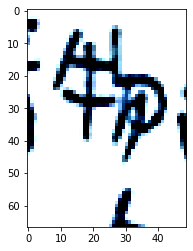

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


網 0.9992 網


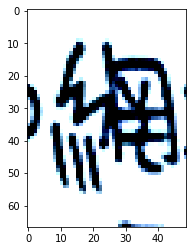

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9527 站 (ISNULL)


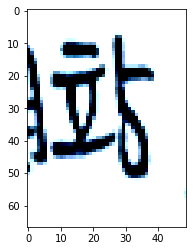

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


田 0.6488 因 (ISNULL)


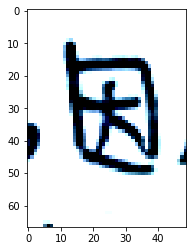

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


人 0.9962 人


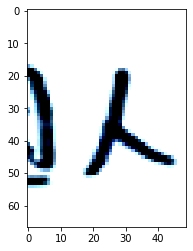

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


員 0.9988 員


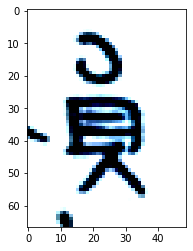

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.696 疏 (ISNULL)


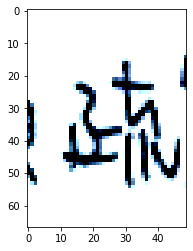

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.6192 忽 (ISNULL)


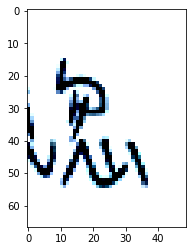

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


造 0.9999 造


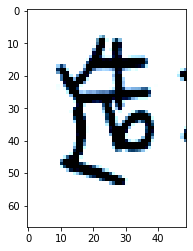

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


成 0.9301 成


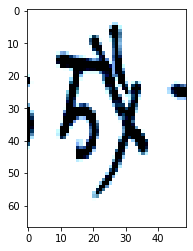

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


瓊 0.4339 價 (ISNULL)


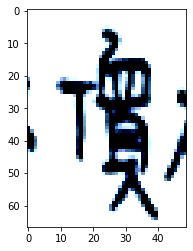

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


格 0.9782 格


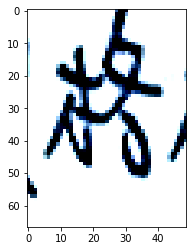

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.6715 標 (ISNULL)


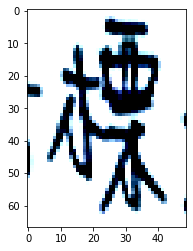

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


禾 0.3746 示 (ISNULL)


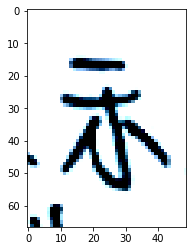

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.907 錯 (ISNULL)


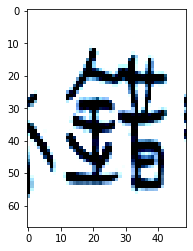

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9847 誤 (ISNULL)


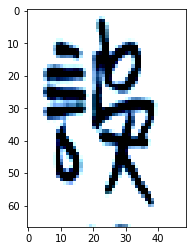

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8467 在 (ISNULL)


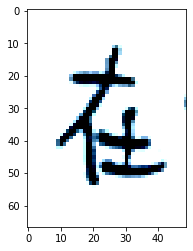

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.5726 此 (ISNULL)


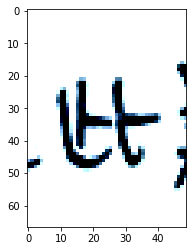

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.7889 為 (ISNULL)


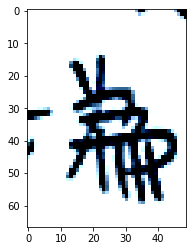

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


大 0.9981 大


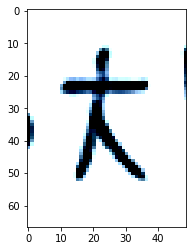

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


家 0.9972 家


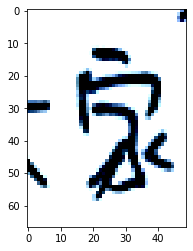

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.2541 帶 (ISNULL)


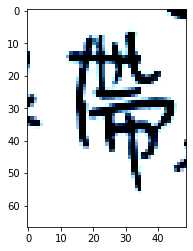

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


來 0.9925 來


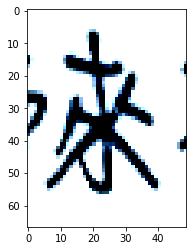

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


不 0.9932 不


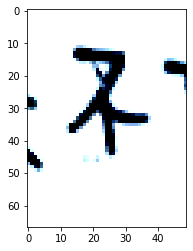

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9168 便 (ISNULL)


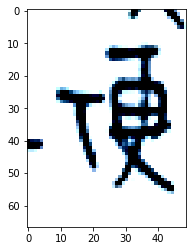

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.7596 及 (ISNULL)


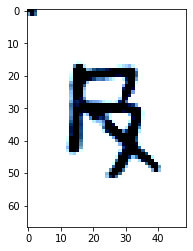

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.5442 困 (ISNULL)


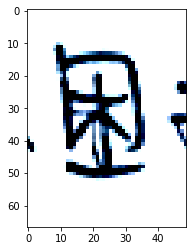

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8938 擾 (ISNULL)


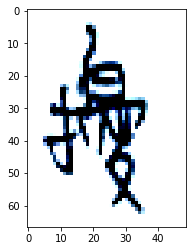

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8714 深 (ISNULL)


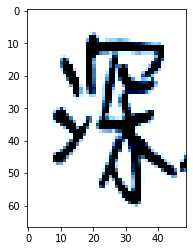

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.923 感 (ISNULL)


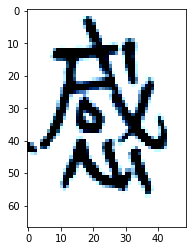

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9398 歉 (ISNULL)


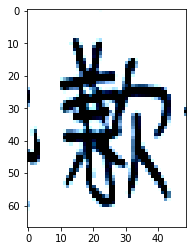

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


意 0.9951 意


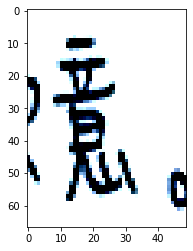

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.4728 也 (ISNULL)


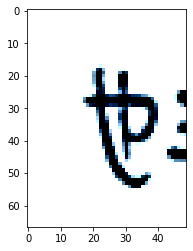

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.6986 非 (ISNULL)


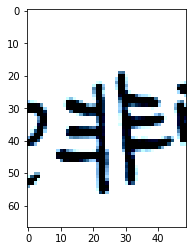

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


常 0.9885 常


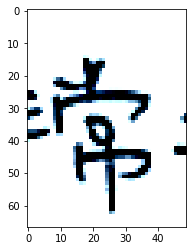

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


謝 0.9942 謝


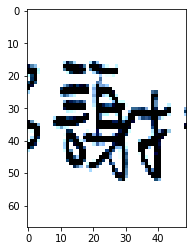

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


謝 0.968 謝


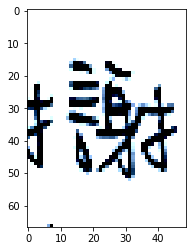

isnull 0.6516 您 (ISNULL)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


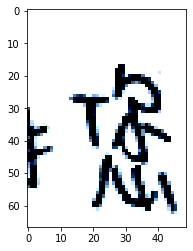

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9263 的 (ISNULL)


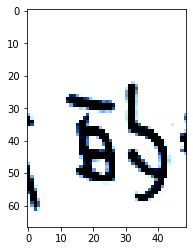

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.6048 諒 (ISNULL)


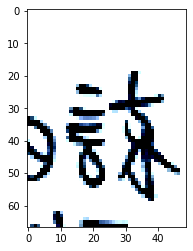

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8951 解 (ISNULL)


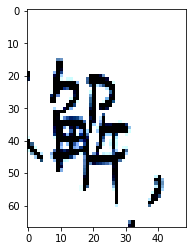

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8868 願 (ISNULL)


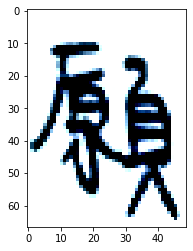

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


意 0.9999 意


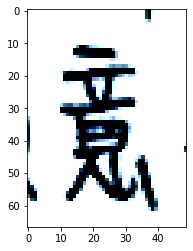

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9883 再 (ISNULL)


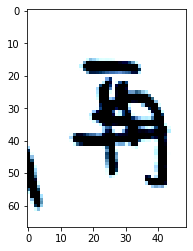

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.7273 給 (ISNULL)


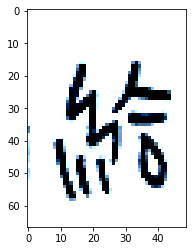

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.5464 我 (ISNULL)


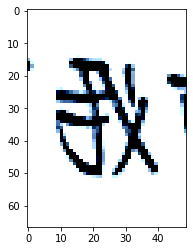

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9309 們 (ISNULL)


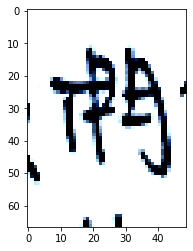

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


年 0.9991 年


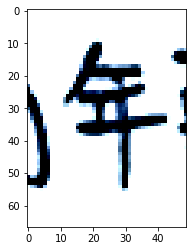

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8376 輕 (ISNULL)


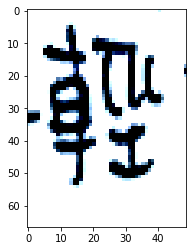

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9866 的 (ISNULL)


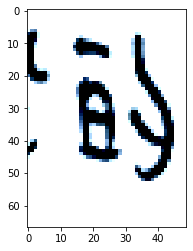

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


員 0.9928 員


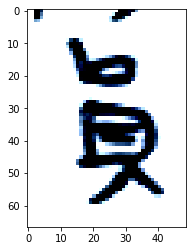

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


工 0.9991 工


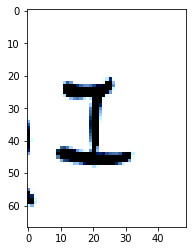

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.4463 一 (ISNULL)


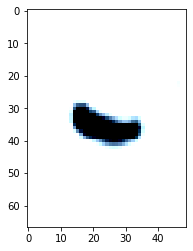

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9468 次 (ISNULL)


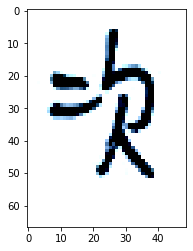

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8961 改 (ISNULL)


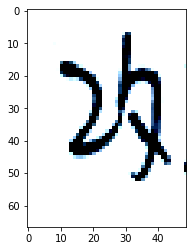

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.7682 過 (ISNULL)


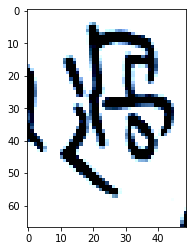

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9526 的 (ISNULL)


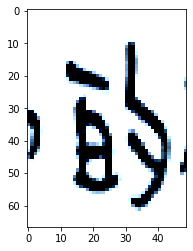

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


機 0.9914 機


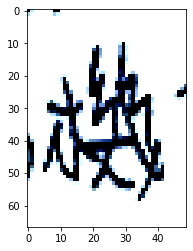

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


會 1.0 會


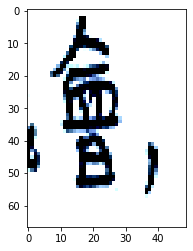

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9273 為 (ISNULL)


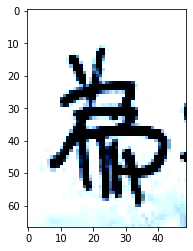

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.687 避 (ISNULL)


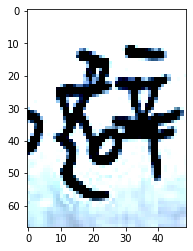

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9551 免 (ISNULL)


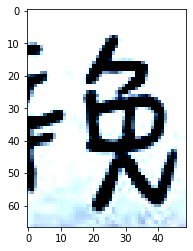

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


日 0.9703 日


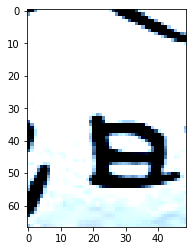

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.7798 後 (ISNULL)


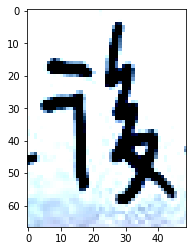

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


不 0.9998 不


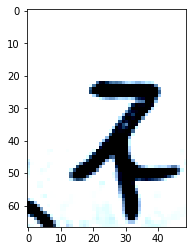

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9422 要 (ISNULL)


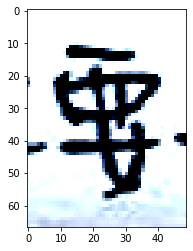

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9608 再 (ISNULL)


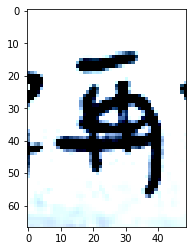

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


發 0.9913 發


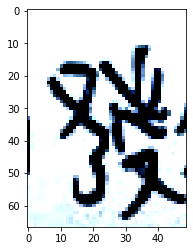

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生 0.9719 生


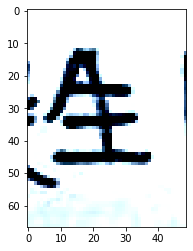

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


同 0.9995 同


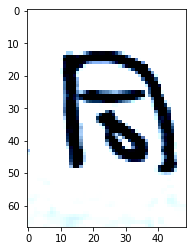

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9182 樣 (ISNULL)


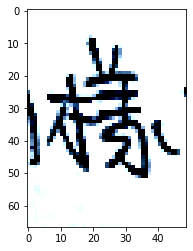

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9855 的 (ISNULL)


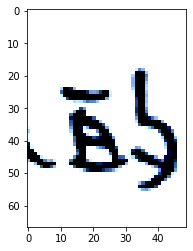

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8463 錯 (ISNULL)


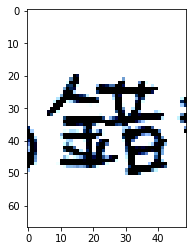

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9952 誤 (ISNULL)


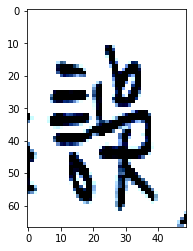

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


會 0.9971 會


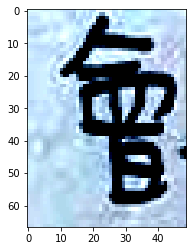

isnull 0.8352 再 (ISNULL)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


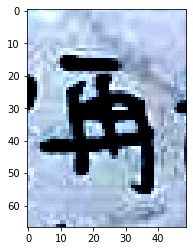

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


加 0.9995 加


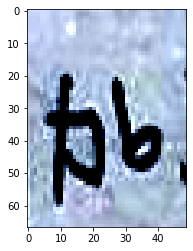

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


強 0.9984 強


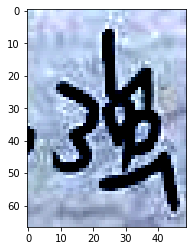

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


員 0.9994 員


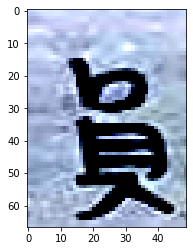

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


工 1.0 工


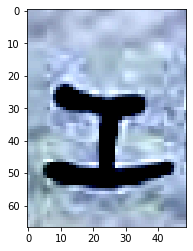

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


教 0.9926 教


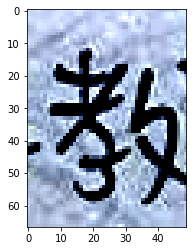

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


育 0.8794 育


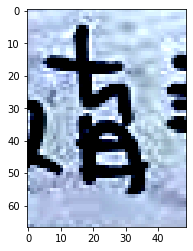

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9331 訓 (ISNULL)


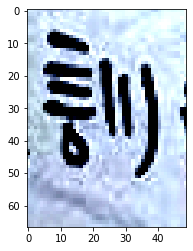

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9506 練 (ISNULL)


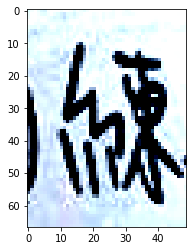

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.5855 以 (ISNULL)


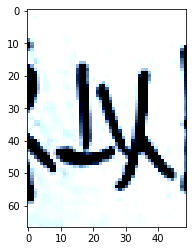

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8936 及 (ISNULL)


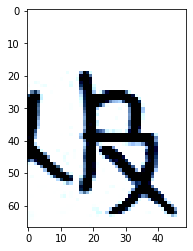

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


強 0.9994 強


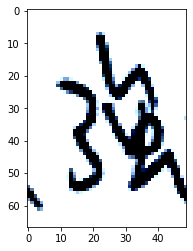

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


力 0.9705 力


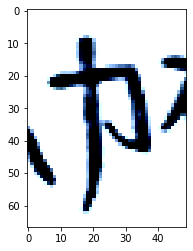

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


竣 0.2783 檢 (ISNULL)


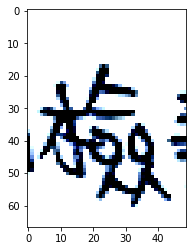

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9346 討 (ISNULL)


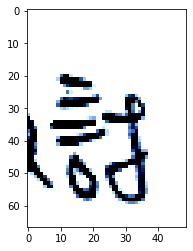

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


作 0.9938 作


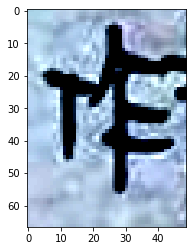

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


業 0.9997 業


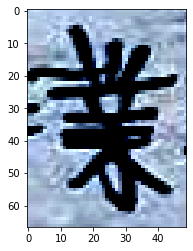

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


流 0.9978 流


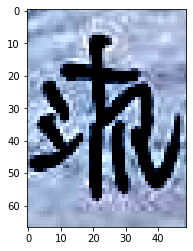

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


程 0.9979 程


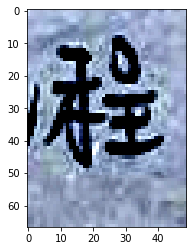

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8444 並 (ISNULL)


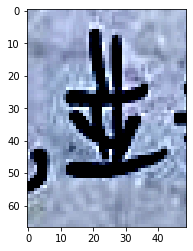

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9574 接 (ISNULL)


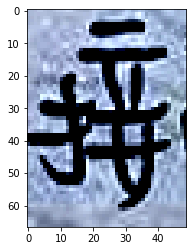

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8361 受 (ISNULL)


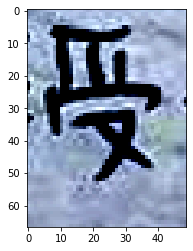

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


大 0.9996 大


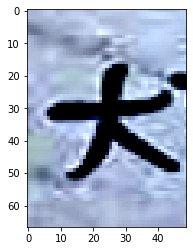

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


家 0.9808 家


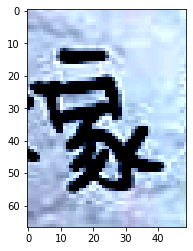

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9155 的 (ISNULL)


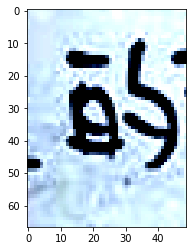

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


意 0.9939 意


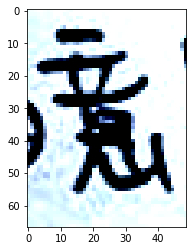

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


兒 0.4422 見 (ISNULL)


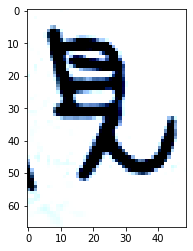

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9048 最 (ISNULL)


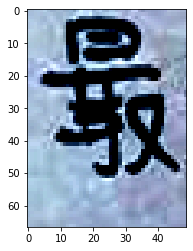

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8749 後 (ISNULL)


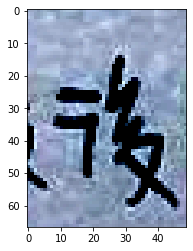

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


謝 1.0 謝


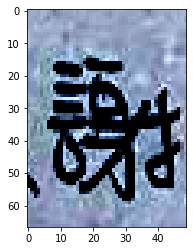

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


謝 0.9694 謝


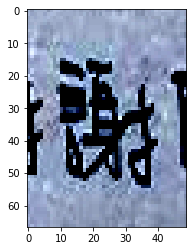

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


所 0.9947 所


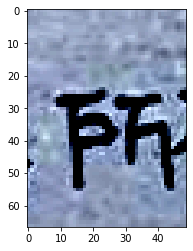

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


有 0.9735 有


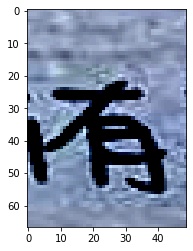

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


喜 0.998 喜


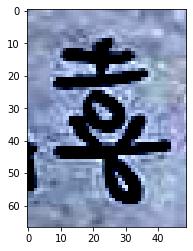

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


愛 0.9923 愛


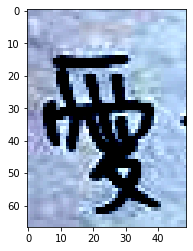

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.4815 我 (ISNULL)


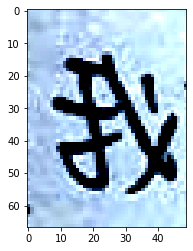

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.898 們 (ISNULL)


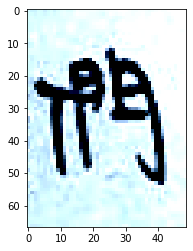

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.89 的 (ISNULL)


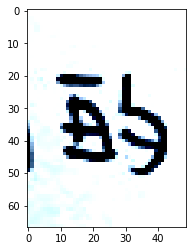

isnull 0.6309 朋 (ISNULL)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


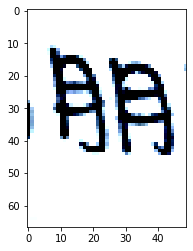

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


友 0.9927 友


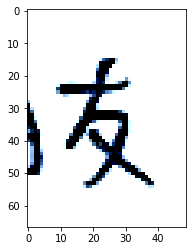

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.5689 耐 (ISNULL)


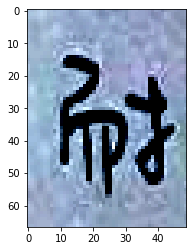

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


心 0.9983 心


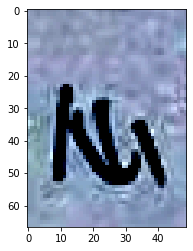

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8652 等 (ISNULL)


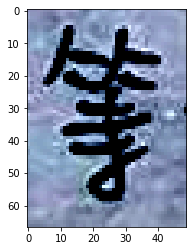

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


侯 0.5891 候 (ISNULL)


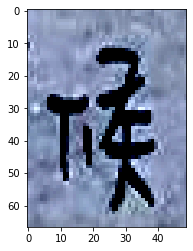

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.7506 與 (ISNULL)


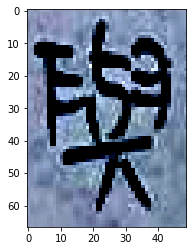

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


體 1.0 體


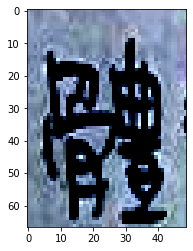

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8437 諒 (ISNULL)


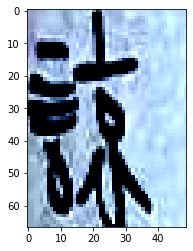

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8899 在 (ISNULL)


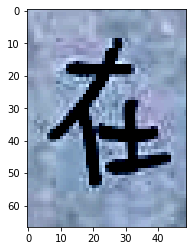

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8983 此 (ISNULL)


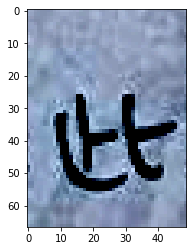

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.4353 獻 (ISNULL)


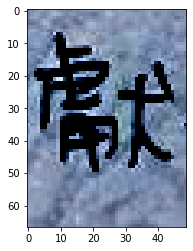

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


上 0.9996 上


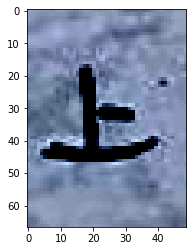

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


士 0.2229 十 (ISNULL)


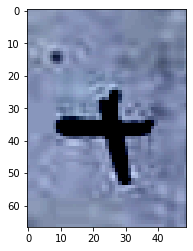

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.8483 二 (ISNULL)


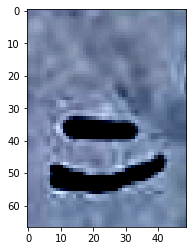

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


萬 0.9996 萬


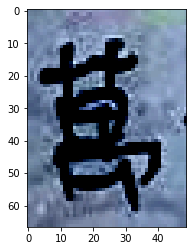

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


分 0.9991 分


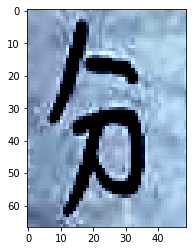

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9962 的 (ISNULL)


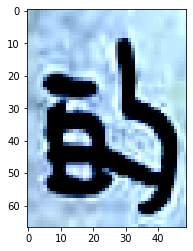

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9191 歉 (ISNULL)


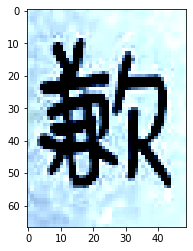

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


意 0.9995 意


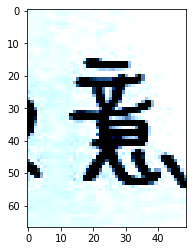

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.5941 快 (ISNULL)


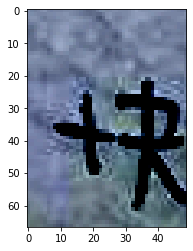

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


車 0.9713 車


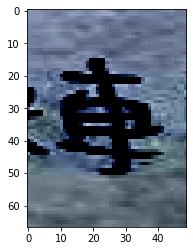

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.5237 肉 (ISNULL)


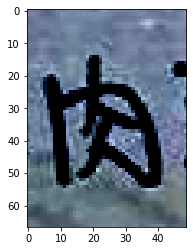

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


isnull 0.9012 乾 (ISNULL)


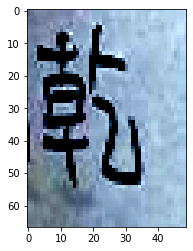

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


全 0.999 全


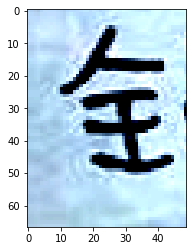

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


體 0.9981 體


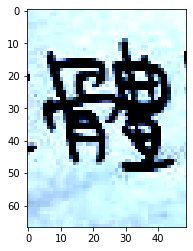

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


員 0.994 員


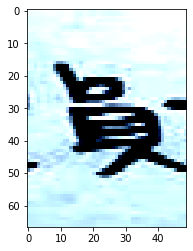

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


工 0.9845 工


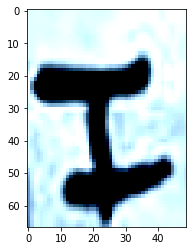

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


敬 0.9999 敬


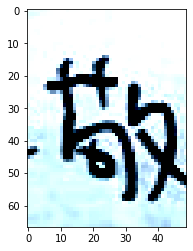

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


上 0.9886 上


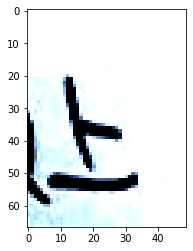

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
for f, lbl in test_data:
    img = io.imread(test_data_path / f)
    img = img[:,:,:3]
    img = test_transform(image=img)['image']
    out = model.to(device).forward(img.unsqueeze(0).to(device))
    prob, pred = torch.max(torch.exp(out).to('cpu'), 1)
    # acc = (pred == lbl).sum().item()
    if lbl in VOCAB:
        print(idx2vocab[pred.item()], round(prob.item(), 4), lbl)
    else:
        print(idx2vocab[pred.item()], round(prob.item(), 4), lbl, "(ISNULL)")
    plt.imshow(img.permute((1, 2, 0)))
    plt.show()